# **Get Data**

import os
import sys
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960

# Set paths for data
DATA_SOURCE_URL = 'https://storage.googleapis.com/kaggle-data-sets/5528638/9152266/bundle/archive.zip'
LOCAL_DATA_PATH = './data/telemarketing'  # Change this to your desired local path
FILE_NAME = 'archive.zip'

# Create directories if they don't exist
if not os.path.exists(LOCAL_DATA_PATH):
    os.makedirs(LOCAL_DATA_PATH, 0o777, exist_ok=True)

# Download the dataset if it doesn't already exist locally
destination_path = os.path.join(LOCAL_DATA_PATH, FILE_NAME)
if not os.path.exists(destination_path):
    print(f'Downloading dataset from {DATA_SOURCE_URL}...')
    try:
        download_url = unquote(DATA_SOURCE_URL)
        with urlopen(download_url) as fileres, open(destination_path, 'wb') as tfile:
            total_length = int(fileres.headers['content-length'])
            dl = 0
            while True:
                data = fileres.read(CHUNK_SIZE)
                if not data:
                    break
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / total_length)
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
        print(f'\nDownloaded to: {destination_path}')
    except HTTPError as e:
        print(f'Failed to download {DATA_SOURCE_URL}: {e}')
    except OSError as e:
        print(f'Failed to write file to {destination_path}: {e}')
else:
    print(f'Dataset already exists at {destination_path}')

# Unzip or untar the file if necessary
if destination_path.endswith('.zip'):
    with ZipFile(destination_path, 'r') as zfile:
        print(f'Extracting {destination_path}...')
        zfile.extractall(LOCAL_DATA_PATH)
elif destination_path.endswith(('.tar.gz', '.tar', '.tgz')):
    with tarfile.open(destination_path, 'r:*') as tar:
        print(f'Extracting {destination_path}...')
        tar.extractall(LOCAL_DATA_PATH)
else:
    print('No extraction necessary')

print('Data source import complete.')


In [ ]:
from google.colab import files
import pandas as pd

# Upload the file from your local system
uploaded = files.upload()

# Once uploaded, you can load it into a DataFrame
df = pd.read_csv(list(uploaded.keys())[0])
df.head()  # Display the first few rows to confirm


Saving archive (4) (1).zip to archive (4) (1).zip


<ipython-input-2-568904c7ad5e>:8: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(list(uploaded.keys())[0])


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


# **Data Cleaning and EDA**

**Explore Data**

In [ ]:
# Show the first few rows
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [ ]:
# Get a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45213 entries, 0 to 45212
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   banking marketing  45213 non-null  object
 1   Unnamed: 1         45192 non-null  object
 2   Unnamed: 2         45213 non-null  object
 3   Unnamed: 3         45212 non-null  object
 4   Unnamed: 4         45213 non-null  object
 5   Unnamed: 5         45212 non-null  object
 6   Unnamed: 6         45213 non-null  object
 7   Unnamed: 7         45212 non-null  object
 8   Unnamed: 8         45213 non-null  object
 9   Unnamed: 9         45212 non-null  object
 10  Unnamed: 10        45213 non-null  object
 11  Unnamed: 11        45212 non-null  object
 12  Unnamed: 12        45163 non-null  object
 13  Unnamed: 13        45213 non-null  object
 14  Unnamed: 14        45212 non-null  object
 15  Unnamed: 15        45212 non-null  object
 16  Unnamed: 16        45212 non-null  objec

In [ ]:
# Get descriptive statistics
df.describe()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
count,45213,45192,45213,45212,45213,45212,45213,45212,45213,45212,45213,45212,45163,45213,45212,45212,45212,45213,45183
unique,45213,145,24,10335,5,49,4,3,4,3,5,63,14,2648,67,837,72,6,4
top,customer id and age.,32,20000,0,married,"management,tertiary",yes,no,yes,no,cellular,20,"may, 2017",1.5 min,1,-1,0,unknown,no
freq,1,1509,7290,2767,27214,7801,37091,44396,25130,37967,29285,2030,13747,138,11502,30277,30277,36959,39894


**Handle Missing Values:**

In [ ]:
# Check for missing values
df.isnull().sum()

,0
banking marketing,0
Unnamed: 1,21
Unnamed: 2,0
Unnamed: 3,1
Unnamed: 4,0
Unnamed: 5,1
Unnamed: 6,0
Unnamed: 7,1
Unnamed: 8,0
Unnamed: 9,1


In [ ]:
# Drop rows with missing values
df = df.dropna()

0

**Correct Data Types:**

In [ ]:
# Print column names to verify
print(df.columns)

Index(['banking marketing', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')


In [ ]:
# Display the first few rows of the DataFrame
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no


In [ ]:
new_column_names = [
    'customerid', 'age', 'salary', 'balance', 'marital', 'jobedu',
    'targeted', 'default', 'housing', 'loan', 'contact', 'day', 'month',
    'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'response'
]

# Renaming the columns
df.columns = new_column_names
df.reset_index
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [ ]:
# Drop the first row as i found it duplicated (index 1)
df = df.drop(index=1)

#  reset the index after dropping the first row
df.reset_index(drop=True, inplace=True)
df


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45106,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45107,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45108,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45109,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


**Standardize or Normalize Data**

In [ ]:
df.dtypes

,0
customerid,Int64
age,Int64
salary,Int64
balance,Int64
marital,object
jobedu,object
targeted,object
default,object
housing,object
loan,object


In [ ]:
# Function to convert duration to seconds
def convert_to_seconds(duration_str):
    # Split the string into numeric part and unit part
    value, unit = duration_str.split()

    # Convert value to a float
    value = float(value)

    # Convert to seconds based on the unit
    if unit == 'min':
        return value * 60
    elif unit == 'sec':
        return value
    else:
        raise ValueError(f"Unknown unit: {unit}")

# Apply the conversion function to the 'duration' column
df['duration'] = df['duration'].apply(convert_to_seconds)

In [ ]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261.0,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151.0,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76.0,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92.0,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45106,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",977.0,3,-1,0,unknown,yes
45107,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",456.0,2,-1,0,unknown,yes
45108,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",1127.0,5,184,3,success,yes
45109,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",508.0,4,-1,0,unknown,no


In [ ]:
## check unique values for target column
df.targeted.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
## check unique values for target column
df.default.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# df['month'] = df['month'].astype(str)

In [ ]:

# df['day_month'] = df['day'] + ' ' + df['month']

In [ ]:
#convert month column for date tpe

df['month'] = pd.to_datetime(df['month'], dayfirst=True)

# Format to 'Month Year'
df['month_formatted'] = df['month'].dt.strftime('%B %Y')
df['month_formatted']

<ipython-input-21-a3034340fa9f>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month'] = pd.to_datetime(df['month'], dayfirst=True)


,month_formatted
0,May 2017
1,May 2017
2,May 2017
3,May 2017
4,May 2017
...,...
45106,November 2017
45107,November 2017
45108,November 2017
45109,November 2017


In [ ]:
#convert day column for date tpe
df['day']=df['day'].astype('int')
df['day'] = pd.to_datetime(df['day'])

# Format to 'day'
df['day_formatted'] = df['day'].dt.day
df['day_formatted']



,day_formatted
0,1
1,1
2,1
3,1
4,1
...,...
45106,1
45107,1
45108,1
45109,1


In [ ]:
# Drop The old format for day and month columns
df.drop(columns=['month','day'],inplace=True)


In [ ]:
 # Add anew column that have the day, month  and the year
df['date']=df['month_formatted']+'-'+df['day_formatted'].astype(str)

# convert the date column to type date
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# if you want to drop the to columns of month_formatted and day_formatted un comment the below line
# df.drop(columns=['month_formatted','day_formatted'],inplace=True)

In [ ]:
df

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,response,month_formatted,day_formatted,date
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,261.0,1,-1,0,unknown,no,May 2017,1,2017-05-01
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,151.0,1,-1,0,unknown,no,May 2017,1,2017-05-01
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,76.0,1,-1,0,unknown,no,May 2017,1,2017-05-01
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,92.0,1,-1,0,unknown,no,May 2017,1,2017-05-01
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,198.0,1,-1,0,unknown,no,May 2017,1,2017-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45106,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,977.0,3,-1,0,unknown,yes,November 2017,1,2017-11-01
45107,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,456.0,2,-1,0,unknown,yes,November 2017,1,2017-11-01
45108,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,1127.0,5,184,3,success,yes,November 2017,1,2017-11-01
45109,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,508.0,4,-1,0,unknown,no,November 2017,1,2017-11-01


In [ ]:
df.jobedu.unique()

array(['management,tertiary', 'technician,secondary',
       'entrepreneur,secondary', 'blue-collar,unknown', 'unknown,unknown',
       'entrepreneur,tertiary', 'retired,primary', 'admin.,secondary',
       'technician,unknown', 'services,secondary', 'admin.,unknown',
       'blue-collar,primary', 'blue-collar,secondary',
       'management,secondary', 'retired,secondary', 'retired,unknown',
       'admin.,primary', 'self-employed,tertiary', 'services,primary',
       'admin.,tertiary', 'retired,tertiary', 'technician,tertiary',
       'self-employed,primary', 'technician,primary',
       'management,unknown', 'unemployed,tertiary', 'services,unknown',
       'housemaid,primary', 'self-employed,secondary',
       'unemployed,secondary', 'student,secondary',
       'entrepreneur,unknown', 'services,tertiary', 'student,unknown',
       'unemployed,unknown', 'entrepreneur,primary', 'student,tertiary',
       'self-employed,unknown', 'unemployed,primary',
       'management,primary', 'blue

In [ ]:
# # Split 'jobedu' into separate columns
df[['job', 'education']] = df['jobedu'].str.split(',', expand=True)

# # Drop the original 'jobedu' column
df.drop(columns='jobedu', inplace=True)
df

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,month_formatted,day_formatted,date,job,education
0,1,58,100000,2143,married,yes,no,yes,no,unknown,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,management,tertiary
1,2,44,60000,29,single,yes,no,yes,no,unknown,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,technician,secondary
2,3,33,120000,2,married,yes,no,yes,yes,unknown,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,entrepreneur,secondary
3,4,47,20000,1506,married,no,no,yes,no,unknown,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,blue-collar,unknown
4,5,33,0,1,single,no,no,no,no,unknown,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45106,45207,51,60000,825,married,yes,no,no,no,cellular,...,3,-1,0,unknown,yes,November 2017,1,2017-11-01,technician,tertiary
45107,45208,71,55000,1729,divorced,yes,no,no,no,cellular,...,2,-1,0,unknown,yes,November 2017,1,2017-11-01,retired,primary
45108,45209,72,55000,5715,married,yes,no,no,no,cellular,...,5,184,3,success,yes,November 2017,1,2017-11-01,retired,secondary
45109,45210,57,20000,668,married,yes,no,no,no,telephone,...,4,-1,0,unknown,no,November 2017,1,2017-11-01,blue-collar,secondary


<Axes: xlabel='contact'>

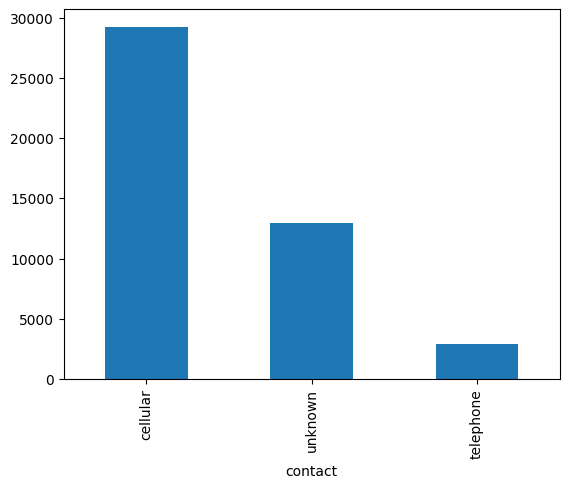

In [ ]:
#  plottint the values and illustrating that the 'cellular' is the mode to replace the inknown values with it
import matplotlib.pyplot as plt
df.contact.value_counts().plot(kind='bar')

In [ ]:
df.contact.value_counts()
# df.contact.mode()
# we can replace the unknown values with the value that more repeated (mode) , to maintain consistency and reduce the impact of missing or unknown data
# Replace 'unknown' values with the mode
mode_value = df['contact'].mode()[0]
df['contact'].replace('unknown', mode_value, inplace=True)



In [ ]:
df.contact.value_counts()

,count
contact,
cellular,42210
telephone,2901


In [ ]:
df.job.value_counts()

,count
job,
blue-collar,9713
management,9442
technician,7581
admin.,5159
services,4142
retired,2258
self-employed,1572
entrepreneur,1483
unemployed,1302


### **Data Analysis**

In [ ]:
# make sure that non duplicated column
df['customerid'].nunique()

45111

In [ ]:
# Maximum value in the 'age' column
max_age = df['age'].max()

# Minimum value in the 'age' column
min_age = df['age'].min()

# Identifies the most frequently occurring value in the 'age' column and determines its frequency.
mode_value = df['age'].mode()[0]
mode_count = df['age'].value_counts().loc[mode_value]

print(f'The maximum age is {max_age} years, the minimum age is {min_age} years, and the most repeated age is {mode_value} years with {mode_count} occurrences.')


The maximum age is 95 years, the minimum age is 18 years, and the most repeated age is 32 years with 2082 occurrences.


In [ ]:
# Maximum value in the 'salary' column
max_salary = df['salary'].max()

# Minimum value in the 'salary' column
min_salary = df['salary'].min()

# Identifies the most frequently occurring value in the 'salary' column and determines its frequency.
mode_value = df['salary'].mode()[0]
mode_count = df['salary'].value_counts().loc[mode_value]

print(f'The maximum salary is {max_salary} , the minimum salary is {min_salary} , and the most repeated salary is {mode_value}  with {mode_count} occurrences.')


The maximum salary is 120000 , the minimum salary is 0 , and the most repeated salary is 20000  with 9713 occurrences.


In [ ]:
## Count the occurrences of each unique value in the 'marital' column and reset index
marital_counts_df = df[['marital']].value_counts().reset_index(name='count')
marital_counts_df

,marital,count
0,married,27154
1,single,12762
2,divorced,5195


[Text(0, 0, 'married'), Text(1, 0, 'single'), Text(2, 0, 'divorced')]

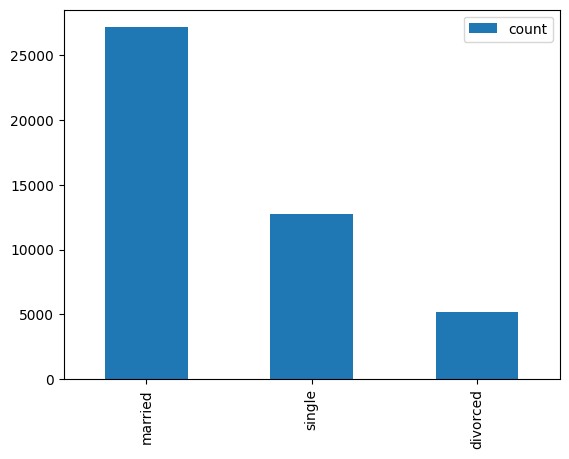

In [ ]:
# plotting the unique value s for marital column and Rename the x-axis tick labels to 'married', 'single', and 'divorced'

import matplotlib.pyplot as plt
plotting_marital= marital_counts_df.plot(kind='bar')
plotting_marital.set_xticklabels(['married', 'single', 'divorced'])

In [ ]:
## summarizing the balance column
balance_summary = df['balance'].describe()
balance_summary

,balance
count,45111.0
mean,1362.539647
std,3046.016714
min,-8019.0
25%,72.0
50%,448.0
75%,1428.0
max,102127.0


In [ ]:
## Count the occurrences of each unique value in the 'targeted' column and reset index
targeted_counts_df = df[['targeted']].value_counts().reset_index(name='count')
targeted_counts_df

,targeted,count
0,yes,37014
1,no,8097


[Text(0, 0, 'yes'), Text(1, 0, 'no')]

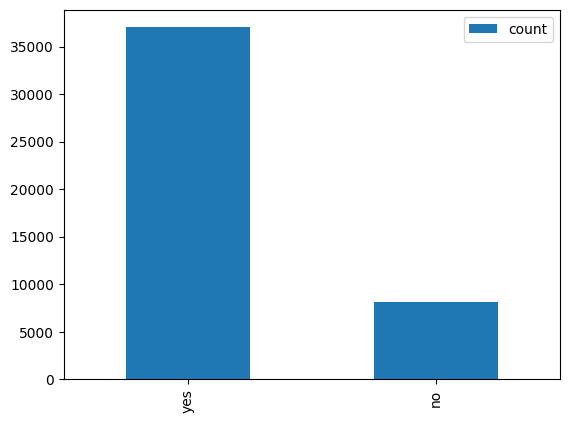

In [ ]:
# plotting the unique value s for marital column and Rename the x-axis tick labels to 'yes' and 'no'

import matplotlib.pyplot as plt
plotting_targeted= targeted_counts_df.plot(kind='bar')
plotting_targeted.set_xticklabels(['yes', 'no'])

In [ ]:
## Count the occurrences of each unique value in the 'default' column and reset index
default_counts_df = df[['default']].value_counts().reset_index(name='count')
default_counts_df

,default,count
0,no,44297
1,yes,814


[Text(0, 0, 'no'), Text(1, 0, 'yes')]

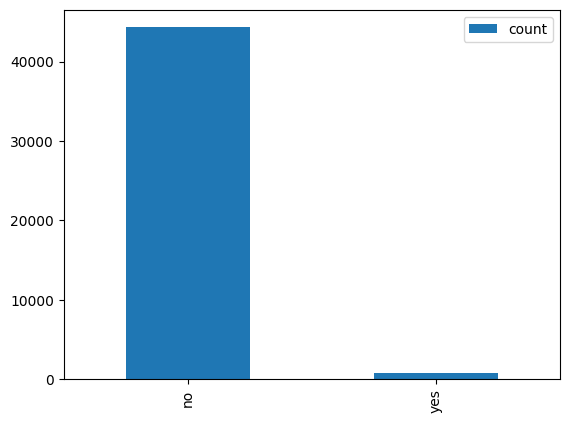

In [ ]:
# plotting the unique value s for default column and Rename the x-axis tick labels to yes and no

import matplotlib.pyplot as plt
plotting_default= default_counts_df.plot(kind='bar')
plotting_default.set_xticklabels(['no', 'yes'])

In [ ]:
# Maximum value in the 'duration' column
max_duration_time = df['duration'].max()

# Minimum value in the 'duration' column excluding zeros
# df['duration'] > 0 we use this as in our data set 0 refers to not answered call
min_duration_time = df[df['duration'] > 0]['duration'].min()

# Identifies the average call duration
average_duration_time = df['duration'].mean()

print(f'The maximum call duration is {max_duration_time} seconds, the minimum call duration (excluding zeros) is {min_duration_time} seconds, and the average call duration is {average_duration_time:.2f} seconds.')


The maximum call duration is 4918.000000000002 seconds, the minimum call duration (excluding zeros) is 1.000000000000002 seconds, and the average call duration is 258.16 seconds.


In [ ]:
## Count the occurrences of each unique value in the 'response' column and reset index
response_counts_df = df[['response']].value_counts().reset_index(name='count')
response_counts_df

,response,count
0,no,39832
1,yes,5279


[Text(0, 0, 'no'), Text(1, 0, 'yes')]

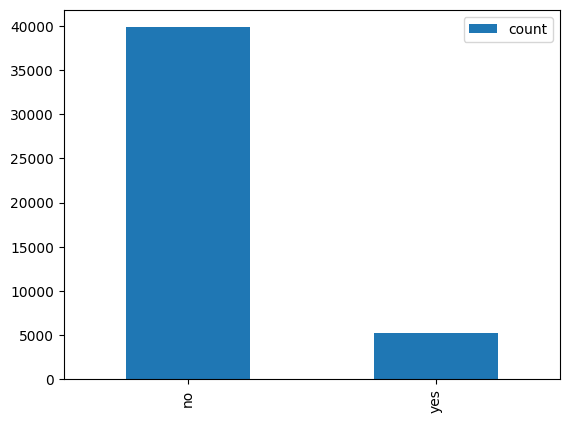

In [ ]:
# plotting the unique value s for response column and Rename the x-axis tick labels to yes and no

import matplotlib.pyplot as plt
plotting_response= response_counts_df.plot(kind='bar')
plotting_response.set_xticklabels(['no', 'yes'])

In [ ]:
# Get the count of unique values in the 'job' column
job_value_counts = df['job'].value_counts()
job_value_counts


,count
job,
blue-collar,9713
management,9442
technician,7581
admin.,5159
services,4142
retired,2258
self-employed,1572
entrepreneur,1483
unemployed,1302


<Axes: ylabel='count'>

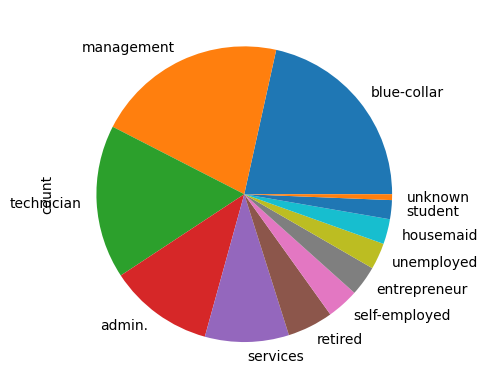

In [ ]:
## plotting the job unique values
job_value_counts.plot(kind='pie')

In [ ]:
# Get the count of unique values in the 'job' column
education_value_counts = df['education'].value_counts()
education_value_counts


,count
education,
secondary,23162
tertiary,13268
primary,6830
unknown,1851


<Axes: ylabel='count'>

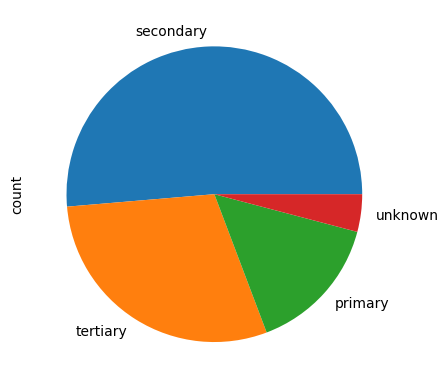

In [ ]:
## plotting the education unique values
education_value_counts.plot(kind='pie')

In [ ]:
# Calculate mean and standard deviation of the 'salary' column
mean_salary = df['salary'].mean()
std_salary = df['salary'].std()

# Print mean and standard deviation
print(f'The mean salary is: {mean_salary:.2f}')
print(f'The standard deviation of salary is: {std_salary:.2f}')

The mean salary is: 57005.79
The standard deviation of salary is: 32090.32


In [ ]:
# there is ahigh variance
# the outliers is more than 3 standard deviasion then :
outliers_limit = df['salary'].mean() + ( 3* df['salary'].std())
df[df.salary > outliers_limit]

# there is no outliers

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,month_formatted,day_formatted,date,job,education


In [ ]:
# Calculate mean and standard deviation of the 'age' column
mean_age = df['age'].mean()
std_age = df['age'].std()

# Print mean and standard deviation
print(f'The mean salary is: {mean_age:.2f}')
print(f'The standard deviation of salary is: {std_age:.2f}')

The mean salary is: 40.94
The standard deviation of salary is: 10.62


In [ ]:
# there is ahigh variance
# the outliers is more than 3 standard deviasion then :
outliers_limit = df['age'].mean() + ( 3* df['age'].std())
df[df.age > outliers_limit]

# there is outliers we should drop it


,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,month_formatted,day_formatted,date,job,education
29087,29159,83,55000,425,married,yes,no,no,no,telephone,...,1,-1,0,unknown,no,February 2017,1,2017-02-01,retired,primary
29190,29262,75,55000,46,divorced,yes,no,no,no,cellular,...,1,-1,0,unknown,no,February 2017,1,2017-02-01,retired,primary
29192,29264,75,55000,3324,married,yes,no,no,no,cellular,...,1,-1,0,unknown,no,February 2017,1,2017-02-01,retired,primary
29251,29323,83,55000,6236,married,yes,no,no,no,cellular,...,2,-1,0,unknown,no,February 2017,1,2017-02-01,retired,tertiary
29794,29866,75,55000,3881,divorced,yes,no,yes,no,cellular,...,3,-1,0,unknown,yes,February 2017,1,2017-02-01,retired,primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45009,45110,78,100000,1780,married,no,no,yes,no,cellular,...,2,185,7,success,yes,October 2017,1,2017-10-01,management,unknown
45018,45119,78,55000,14204,married,yes,no,no,no,cellular,...,1,183,1,other,no,October 2017,1,2017-10-01,retired,primary
45041,45142,77,0,397,married,no,no,no,no,telephone,...,1,185,3,success,no,November 2017,1,2017-11-01,unknown,unknown
45091,45192,75,55000,3810,divorced,no,no,yes,no,cellular,...,1,183,1,failure,yes,November 2017,1,2017-11-01,retired,tertiary


In [ ]:
# Drop rows where 'age' exceeds the outliers limit
df_cleaned = df[df['age'] <= outliers_limit]
df_cleaned

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,month_formatted,day_formatted,date,job,education
0,1,58,100000,2143,married,yes,no,yes,no,cellular,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,management,tertiary
1,2,44,60000,29,single,yes,no,yes,no,cellular,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,technician,secondary
2,3,33,120000,2,married,yes,no,yes,yes,cellular,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,entrepreneur,secondary
3,4,47,20000,1506,married,no,no,yes,no,cellular,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,blue-collar,unknown
4,5,33,0,1,single,no,no,no,no,cellular,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45106,45207,51,60000,825,married,yes,no,no,no,cellular,...,3,-1,0,unknown,yes,November 2017,1,2017-11-01,technician,tertiary
45107,45208,71,55000,1729,divorced,yes,no,no,no,cellular,...,2,-1,0,unknown,yes,November 2017,1,2017-11-01,retired,primary
45108,45209,72,55000,5715,married,yes,no,no,no,cellular,...,5,184,3,success,yes,November 2017,1,2017-11-01,retired,secondary
45109,45210,57,20000,668,married,yes,no,no,no,telephone,...,4,-1,0,unknown,no,November 2017,1,2017-11-01,blue-collar,secondary


In [ ]:
# Grouping the DataFrame by 'age' and calculating the mean salary for each age group
age_salary_mean_df = df.groupby('age')['salary'].mean().reset_index()
age_salary_mean_df


,age,salary
0,18,4000.0
1,19,4000.0
2,20,8440.0
3,21,19974.683544
4,22,29156.25
...,...,...
72,90,55000.0
73,92,55000.0
74,93,55000.0
75,94,55000.0


In [ ]:

import numpy as np
# Create a cross-tabulation table between 'marital' status and 'salary'
pd.crosstab(df.marital,df.salary)

salary,0,4000,8000,16000,20000,50000,55000,60000,70000,100000,120000
marital,,,,,,,,,,,
divorced,17,6,171,183,747,749,423,1063,547,1110,179
married,203,54,731,908,6953,2686,1727,5035,2398,5392,1067
single,68,877,400,143,2013,1724,108,3055,1197,2940,237


In [ ]:
# Create a cross-tabulation table between 'marital' status and 'age'
pd.crosstab(df.marital,df.age)

age,18,19,20,21,22,23,24,25,26,27,...,85,86,87,88,89,90,92,93,94,95
marital,,,,,,,,,,,,,,,,,,,,,
divorced,0,0,0,0,0,0,1,6,20,18,...,1,2,1,0,1,2,0,0,1,1
married,0,0,3,5,9,27,51,98,168,233,...,4,6,3,2,2,0,2,2,0,1
single,12,35,47,74,119,174,248,422,615,657,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Create a cross-tabulation table between 'marital' status and 'age'
pd.crosstab(df.age,df.duration)

duration,0.0,1.0,2.0,2.0,3.0,4.0,4.0,5.0,5.0,6.0,...,3102.0,3183.0,3253.0,3284.0,3322.0,3366.0,3422.0,3785.0,3881.0,4918.0
age,,,,,,,,,,,,,,,,,,,,,
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
############pd.crosstab(df.age, df.duration).plot(kind='pie',subplots=True)#######

In [ ]:
# Create a cross-tabulation table between 'contact' status and 'duration'
pd.crosstab(df.contact,df.duration)

duration,0.0,1.0,2.0,2.0,3.0,4.0,4.0,5.0,5.0,6.0,...,3102.0,3183.0,3253.0,3284.0,3322.0,3366.0,3422.0,3785.0,3881.0,4918.0
contact,,,,,,,,,,,,,,,,,,,,,
cellular,3,2,1,1,4,3,12,27,4,40,...,1,1,0,0,1,1,1,1,1,0
telephone,0,0,1,0,0,0,0,4,0,5,...,0,0,1,1,0,0,0,0,0,1


<Axes: xlabel='contact'>

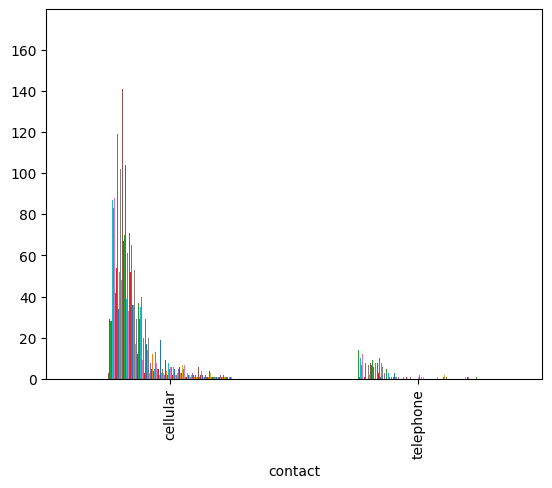

In [ ]:

pd.crosstab(df.contact,df.duration).plot(kind='bar',legend=False)

In [ ]:
# Create a cross-tabulation table between 'marital' status and 'targeted'
pd.crosstab(df.marital,df.targeted)

targeted,no,yes
marital,,
divorced,1638,3557
married,1155,25999
single,5304,7458


<Axes: xlabel='marital'>

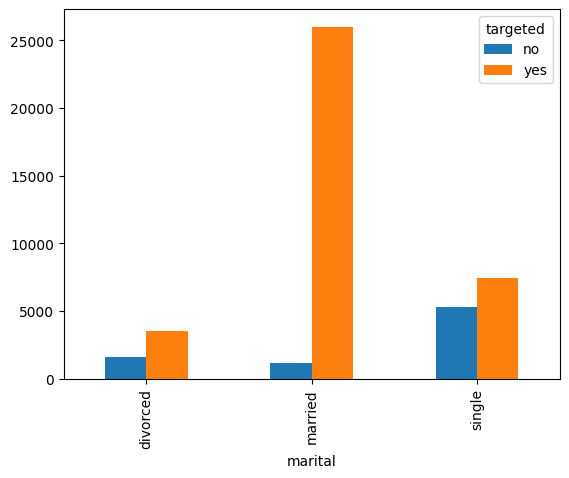

In [ ]:

pd.crosstab(df.marital,df.targeted).plot(kind='bar')

 **Save the Cleaned Data**

In [ ]:
# Save the cleaned data
df.to_csv('/content/cleaned_bank_marketing.csv', index=False)

**Split the data**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# First, split into train and temp sets
df_train, df_temp = train_test_split(df, test_size=1 - train_ratio, random_state=42)

# Then, split temp set into validation and test sets
relative_validation_ratio = validation_ratio / (test_ratio + validation_ratio)
df_val, df_test = train_test_split(df_temp, test_size=1 - relative_validation_ratio, random_state=42)

df_sizes = pd.DataFrame({
    'Set': ['Training', 'Validation', 'Test'],
    'Size': [len(df_train), len(df_val), len(df_test)]
})

df_sizes

,Set,Size
0,Training,31577
1,Validation,6767
2,Test,6767


In [ ]:
df_train

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,month_formatted,day_formatted,date,job,education
30858,30931,43,8000,58,married,yes,no,yes,no,cellular,...,4,-1,0,unknown,no,February 2017,1,2017-02-01,unemployed,tertiary
18346,18394,38,50000,137,married,yes,no,yes,no,cellular,...,22,-1,0,unknown,no,July 2017,1,2017-07-01,admin.,secondary
40538,40626,46,100000,242,married,yes,no,no,no,cellular,...,2,96,1,success,yes,August 2017,1,2017-08-01,management,tertiary
44971,45072,27,8000,771,single,yes,no,no,no,cellular,...,1,302,3,other,yes,October 2017,1,2017-10-01,unemployed,secondary
14286,14326,34,100000,344,single,no,no,no,no,cellular,...,3,-1,0,unknown,no,July 2017,1,2017-07-01,management,tertiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11319,57,20000,1236,married,yes,no,no,no,cellular,...,9,-1,0,unknown,no,June 2017,1,2017-06-01,blue-collar,primary
44732,44832,46,100000,624,divorced,no,no,no,no,cellular,...,2,183,2,success,yes,September 2017,1,2017-09-01,management,tertiary
38158,38241,28,20000,-42,married,yes,no,yes,no,cellular,...,1,364,3,other,no,May 2017,1,2017-05-01,blue-collar,secondary
860,865,37,20000,693,married,yes,no,yes,no,cellular,...,3,-1,0,unknown,no,May 2017,1,2017-05-01,blue-collar,primary


In [ ]:
df_val

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,month_formatted,day_formatted,date,job,education
27871,27941,36,60000,480,single,yes,no,yes,no,cellular,...,1,-1,0,unknown,no,January 2017,1,2017-01-01,technician,secondary
41095,41187,59,100000,2239,married,yes,no,no,no,cellular,...,6,90,1,success,yes,August 2017,1,2017-08-01,management,tertiary
4034,4054,29,70000,2099,single,yes,no,yes,yes,cellular,...,2,-1,0,unknown,no,May 2017,1,2017-05-01,services,secondary
40855,40945,70,60000,6797,married,yes,no,no,no,cellular,...,1,-1,0,unknown,no,August 2017,1,2017-08-01,technician,tertiary
23304,23363,56,70000,83,married,yes,no,no,no,cellular,...,11,-1,0,unknown,no,August 2017,1,2017-08-01,services,secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43063,43159,71,55000,0,divorced,yes,no,no,no,cellular,...,1,171,1,success,yes,February 2017,1,2017-02-01,retired,secondary
31459,31532,67,55000,4066,married,yes,no,no,no,cellular,...,6,-1,0,unknown,no,April 2017,1,2017-04-01,retired,primary
42297,42391,28,50000,330,married,yes,no,no,no,cellular,...,1,188,3,other,yes,December 2017,1,2017-12-01,admin.,secondary
17990,18038,38,120000,0,married,yes,no,yes,no,cellular,...,4,-1,0,unknown,no,July 2017,1,2017-07-01,entrepreneur,primary


In [ ]:
df_test

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,response,month_formatted,day_formatted,date,job,education
6939,6965,33,20000,625,married,yes,no,yes,no,cellular,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,blue-collar,secondary
20718,20771,58,55000,1669,married,yes,no,no,no,cellular,...,2,-1,0,unknown,no,August 2017,1,2017-08-01,retired,tertiary
34781,34857,33,50000,-18,divorced,yes,yes,yes,no,cellular,...,1,359,3,failure,no,May 2017,1,2017-05-01,admin.,secondary
24654,24719,46,50000,4958,married,yes,no,yes,no,cellular,...,3,150,5,other,no,November 2017,1,2017-11-01,admin.,secondary
44883,44984,35,20000,172,divorced,no,no,no,no,cellular,...,1,381,2,other,no,October 2017,1,2017-10-01,blue-collar,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,7871,41,50000,8238,married,yes,no,yes,yes,cellular,...,4,-1,0,unknown,no,May 2017,1,2017-05-01,admin.,secondary
37002,37081,47,20000,4227,married,yes,no,yes,no,cellular,...,1,-1,0,unknown,yes,May 2017,1,2017-05-01,blue-collar,primary
37645,37725,28,20000,206,married,yes,no,yes,no,cellular,...,2,-1,0,unknown,no,May 2017,1,2017-05-01,blue-collar,primary
532,535,52,50000,1236,married,yes,no,yes,no,cellular,...,1,-1,0,unknown,no,May 2017,1,2017-05-01,admin.,secondary


**Data Description**

In [ ]:
df_train.describe()

,customerid,age,salary,balance,duration,day_formatted,date
count,31577.0,31577.0,31577.0,31577.0,31577.000000,31577.0,31577
mean,22654.644583,40.913101,56962.884378,1360.75498,258.707604,1.0,2017-06-05 11:07:53.927225600
min,3.0,18.0,0.0,-8019.0,0.000000,1.0,2017-01-01 00:00:00
25%,11381.0,33.0,20000.0,72.0,103.000000,1.0,2017-05-01 00:00:00
50%,22622.0,39.0,60000.0,453.0,181.000000,1.0,2017-06-01 00:00:00
75%,33961.0,48.0,70000.0,1429.0,320.000000,1.0,2017-08-01 00:00:00
max,45211.0,95.0,120000.0,98417.0,4918.000000,1.0,2017-12-01 00:00:00
std,13021.423532,10.572627,32081.094446,3014.761172,257.941403,0.0,NaN


In [ ]:
df_test.describe()

,customerid,age,salary,balance,duration,day_formatted,date
count,6767.0,6767.0,6767.0,6767.0,6767.000000,6767.0,6767
mean,22462.256539,41.006502,56800.650214,1353.143934,260.704744,1.0,2017-06-04 08:00:29.791635968
min,5.0,18.0,0.0,-2827.0,0.000000,1.0,2017-01-01 00:00:00
25%,10870.5,33.0,20000.0,71.0,104.000000,1.0,2017-05-01 00:00:00
50%,22700.0,39.0,60000.0,435.0,182.000000,1.0,2017-06-01 00:00:00
75%,33685.5,49.0,70000.0,1411.0,319.000000,1.0,2017-08-01 00:00:00
max,45204.0,95.0,120000.0,52527.0,3422.000000,1.0,2017-12-01 00:00:00
std,13190.486351,10.717503,32070.468331,2871.210678,262.889290,0.0,NaN


In [ ]:
df_val.describe()

,customerid,age,salary,balance,duration,day_formatted,date
count,6767.0,6767.0,6767.0,6767.0,6767.000000,6767.0,6767
mean,22553.819566,40.98803,57411.112753,1380.263189,253.077287,1.0,2017-06-06 00:55:57.942958336
min,1.0,18.0,0.0,-3372.0,3.000000,1.0,2017-01-01 00:00:00
25%,11430.5,32.0,20000.0,77.5,102.000000,1.0,2017-05-01 00:00:00
50%,22431.0,39.0,60000.0,439.0,176.000000,1.0,2017-06-01 00:00:00
75%,33833.0,49.0,70000.0,1440.0,312.000000,1.0,2017-08-01 00:00:00
max,45205.0,94.0,120000.0,102127.0,3076.000000,1.0,2017-12-01 00:00:00
std,13029.774182,10.740386,32154.574854,3346.48587,249.840296,0.0,NaN


In [ ]:
    # Frequency counts for categorical columns
categorical_stats_train = df_train.describe(include=['object'])
categorical_stats_train

,marital,targeted,default,housing,loan,contact,campaign,pdays,previous,poutcome,response,month_formatted,job,education
count,31577,31577,31577,31577,31577,31577,31577,31577,31577,31577,31577,31577,31577,31577
unique,3,2,2,2,2,2,63,771,64,4,2,12,12,4
top,married,yes,no,yes,no,cellular,1,-1,0,unknown,no,May 2017,blue-collar,secondary
freq,19057,25966,31002,17483,26502,29538,7991,21162,21162,25854,27909,9545,6793,16250


In [ ]:
    # Frequency counts for categorical columns
categorical_stats_test = df_test.describe(include=['object'])
categorical_stats_test

,marital,targeted,default,housing,loan,contact,campaign,pdays,previous,poutcome,response,month_formatted,job,education
count,6767,6767,6767,6767,6767,6767,6767,6767,6767,6767,6767,6767,6767,6767
unique,3,2,2,2,2,2,49,446,41,4,2,12,12,4
top,married,yes,no,yes,no,cellular,1,-1,0,unknown,no,May 2017,blue-collar,secondary
freq,4067,5549,6654,3787,5691,6335,1736,4551,4551,5528,5928,2124,1462,3461


In [ ]:
 # Frequency counts for categorical columns
categorical_stats_val = df_val.describe(include=['object'])
categorical_stats_val

,marital,targeted,default,housing,loan,contact,campaign,pdays,previous,poutcome,response,month_formatted,job,education
count,6767,6767,6767,6767,6767,6767,6767,6767,6767,6767,6767,6767,6767,6767
unique,3,2,2,2,2,2,48,475,45,4,2,12,12,4
top,married,yes,no,yes,no,cellular,1,-1,0,unknown,no,May 2017,blue-collar,secondary
freq,4030,5499,6641,3800,5692,6337,1749,4495,4495,5495,5995,2062,1458,3451


**Data Visualization**

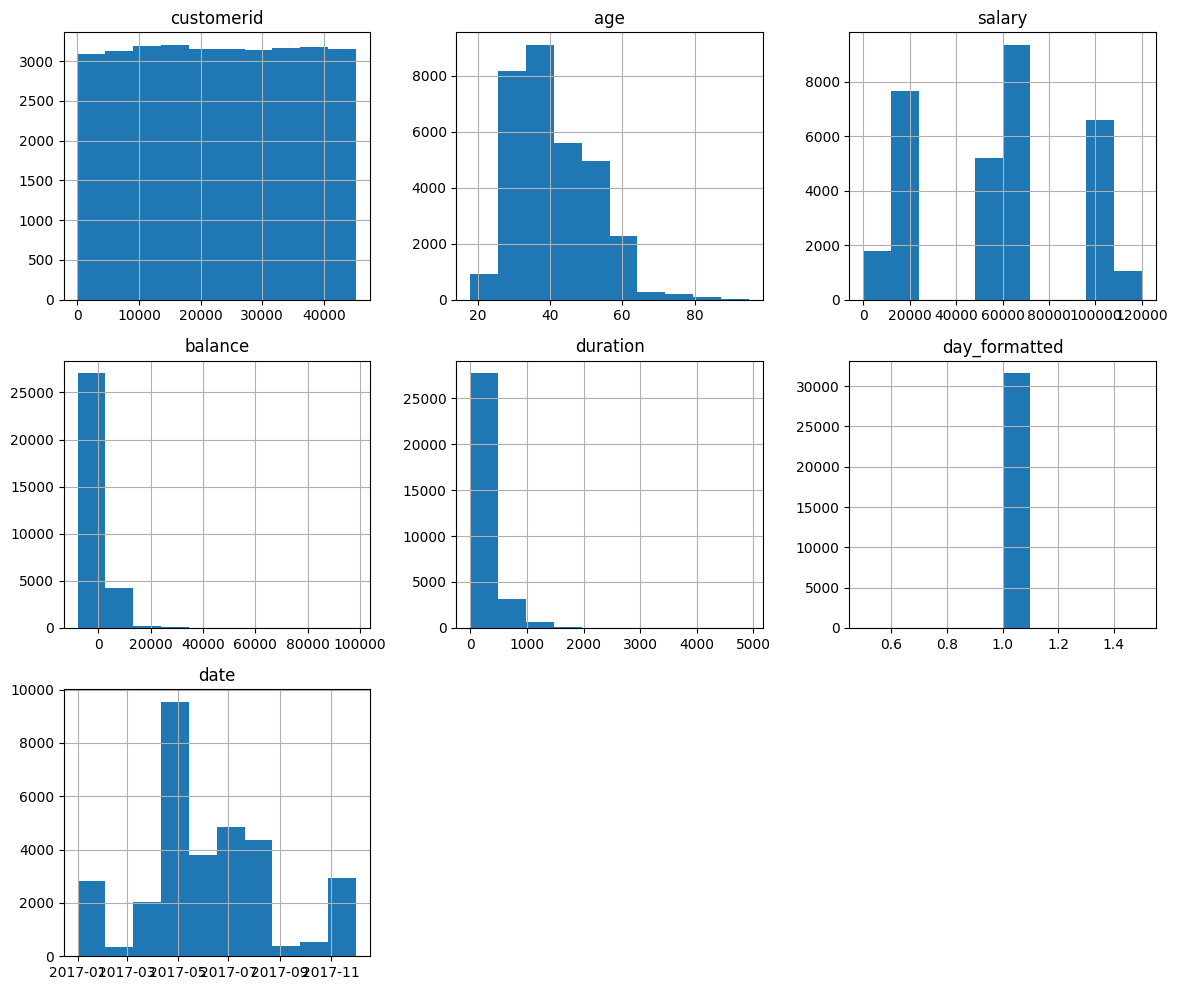

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histograms
df_train.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

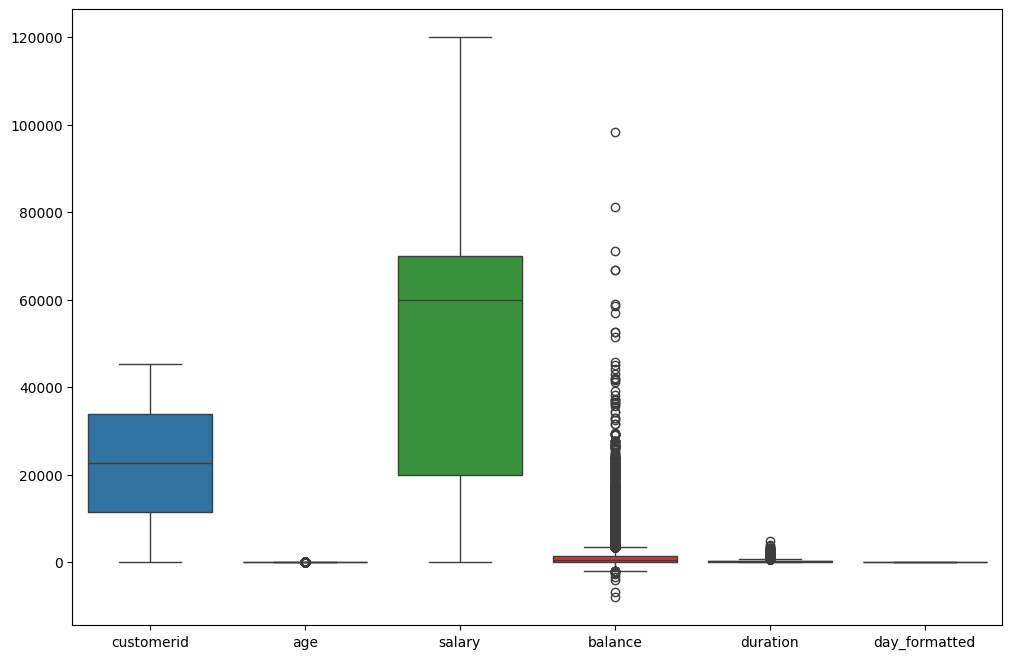

In [ ]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_train)
plt.show()

In [ ]:

# Handling Missing Values
print("Missing values in Training Set:")
print(df_train.isnull().sum())
print("\nMissing values in Validation Set:")
print(df_val.isnull().sum())
print("\nMissing values in Test Set:")
print(df_test.isnull().sum())

Missing values in Training Set:
customerid         0
age                0
salary             0
balance            0
marital            0
targeted           0
default            0
housing            0
loan               0
contact            0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
month_formatted    0
day_formatted      0
date               0
job                0
education          0
dtype: int64

Missing values in Validation Set:
customerid         0
age                0
salary             0
balance            0
marital            0
targeted           0
default            0
housing            0
loan               0
contact            0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
month_formatted    0
day_formatted      0
date               0
job                0
education          0
dtype: int64

Missing values in Test S

**Outlier Detection**

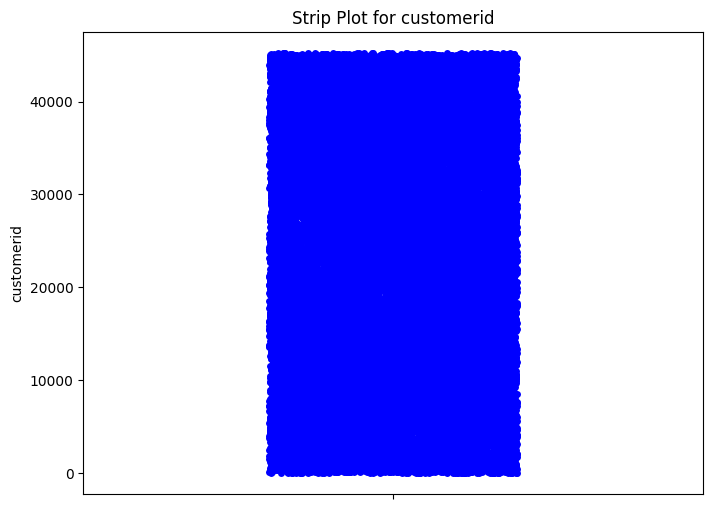

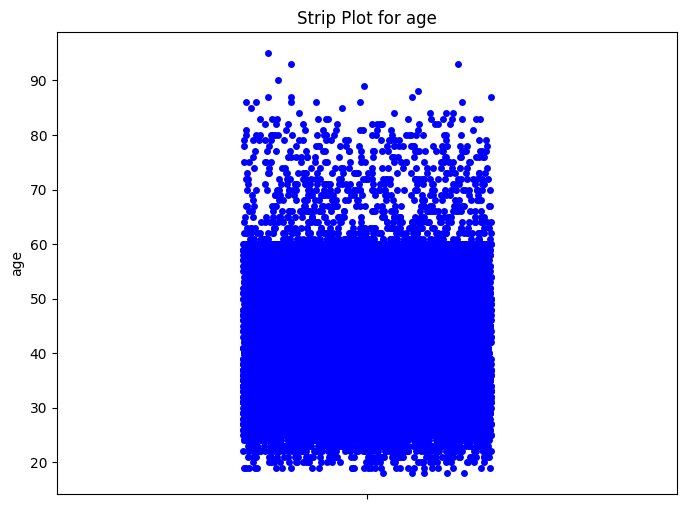

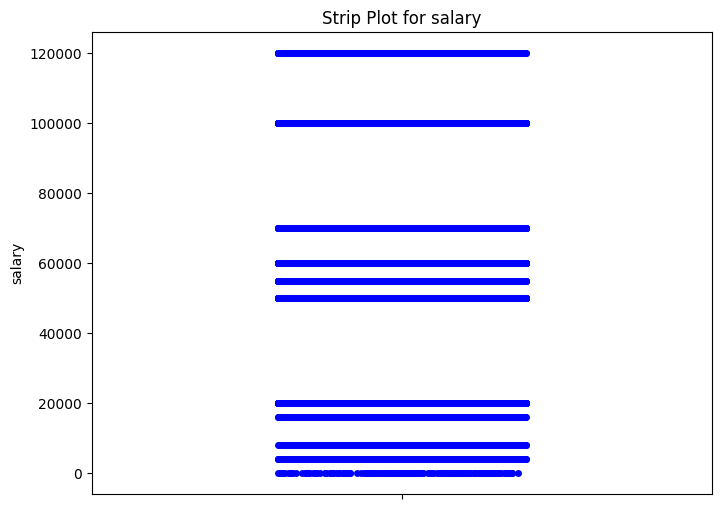

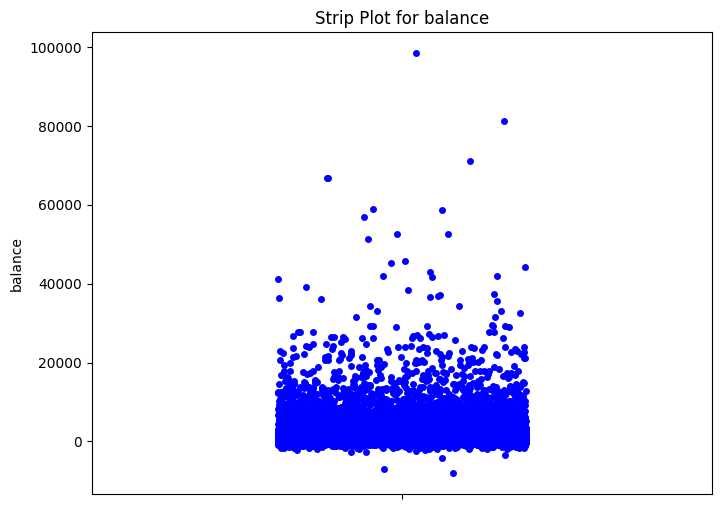

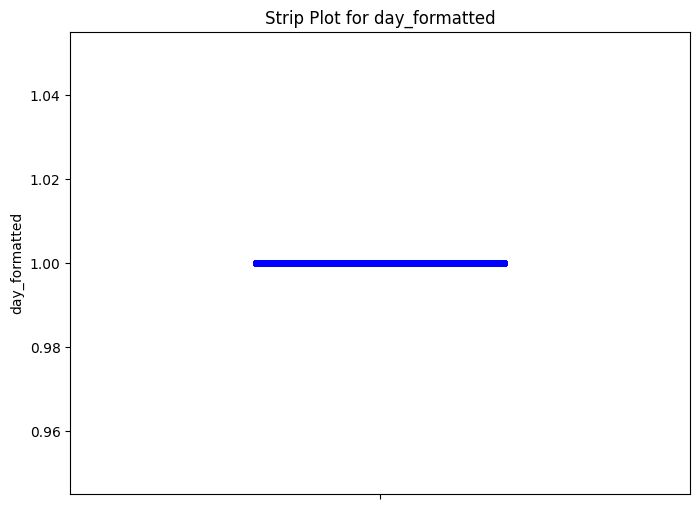

In [ ]:
import numpy as np

def detect_outliers_zscore(data, threshold=10):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = z_scores > threshold
    return outliers

# Assuming 'df_train' is your DataFrame with integer data
integer_columns = df_train.select_dtypes(include='int').columns

# Create strip plots for each integer column
for col in integer_columns:
    plt.figure(figsize=(8, 6))
    sns.stripplot(data=df_train[col], color='b', jitter=0.2)
    plt.title(f'Strip Plot for {col}')
    plt.ylabel(col)
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


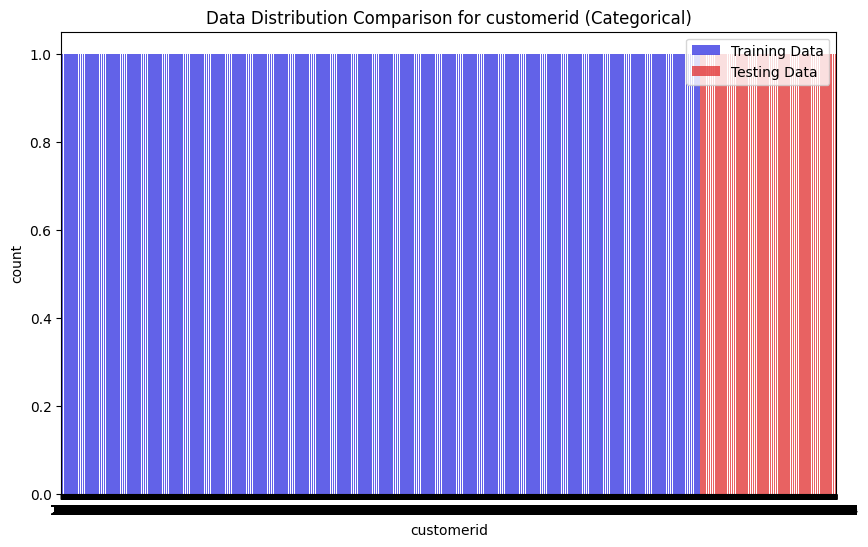

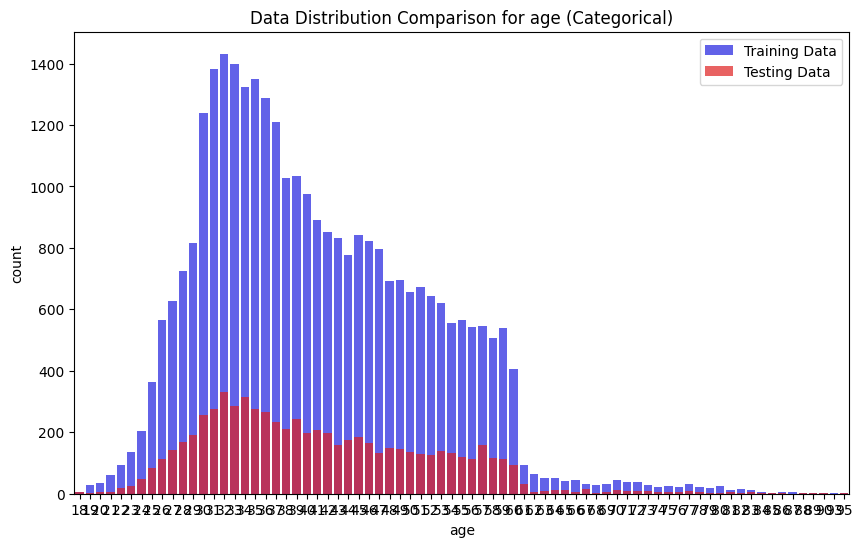

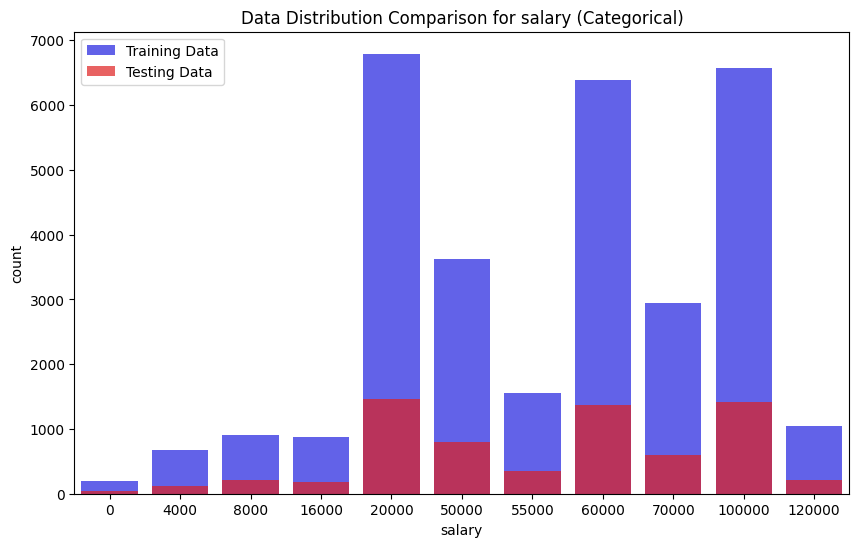

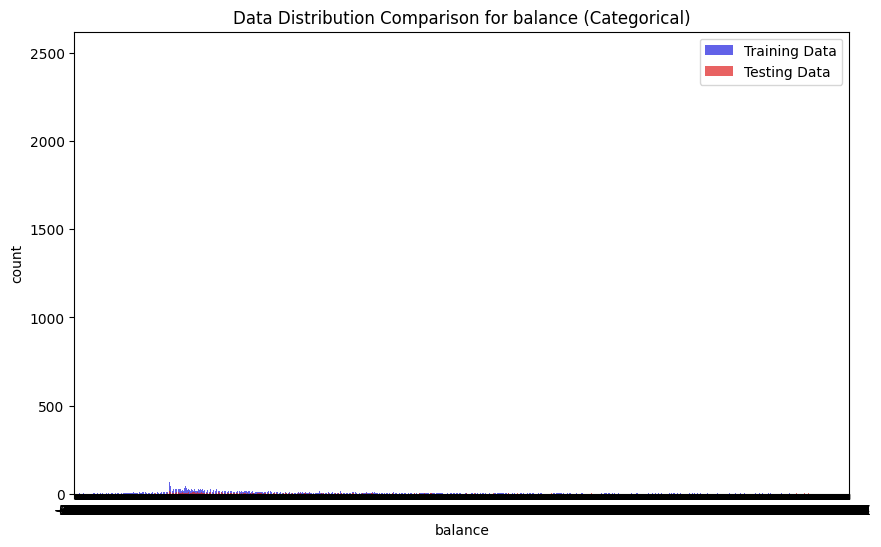

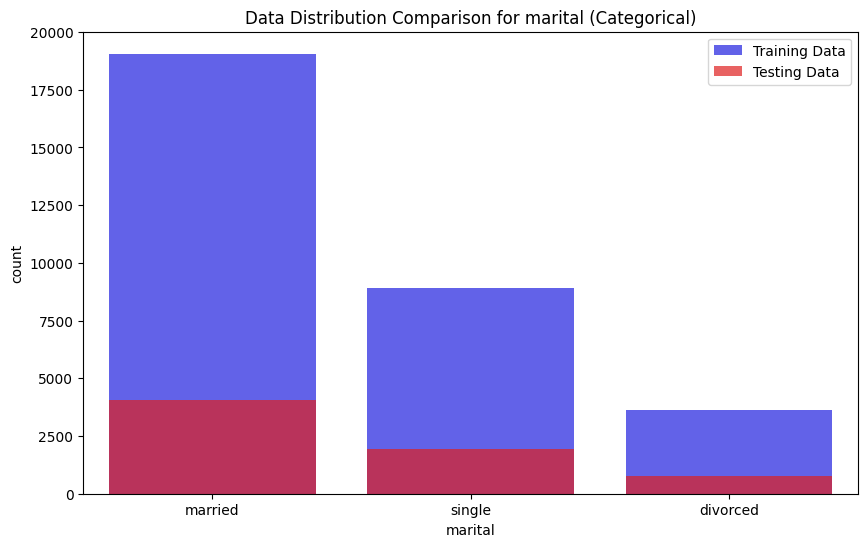

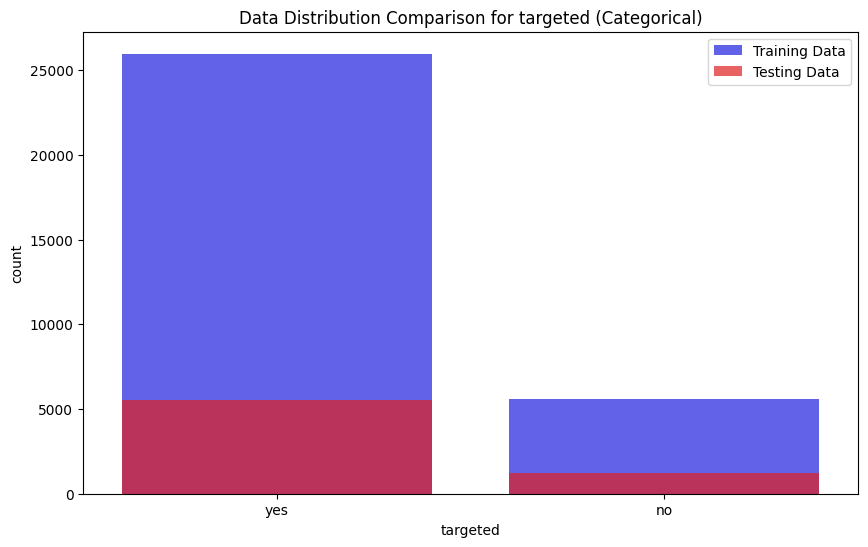

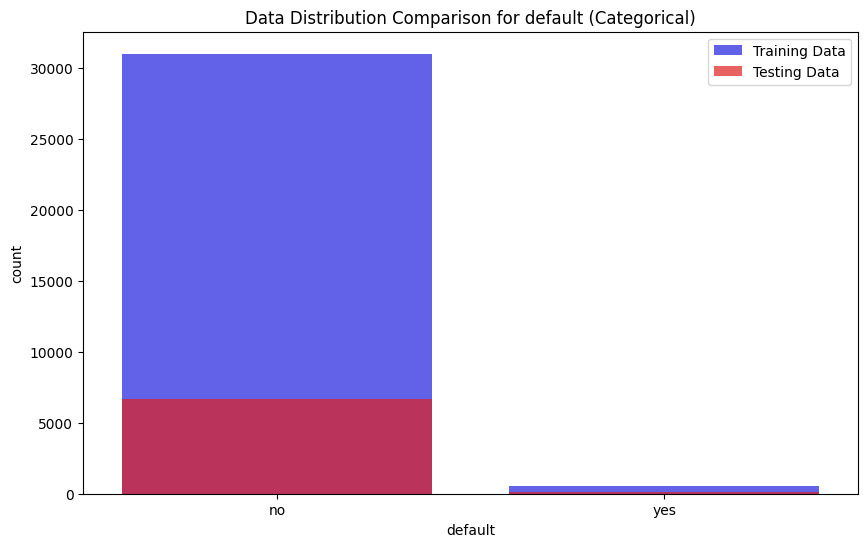

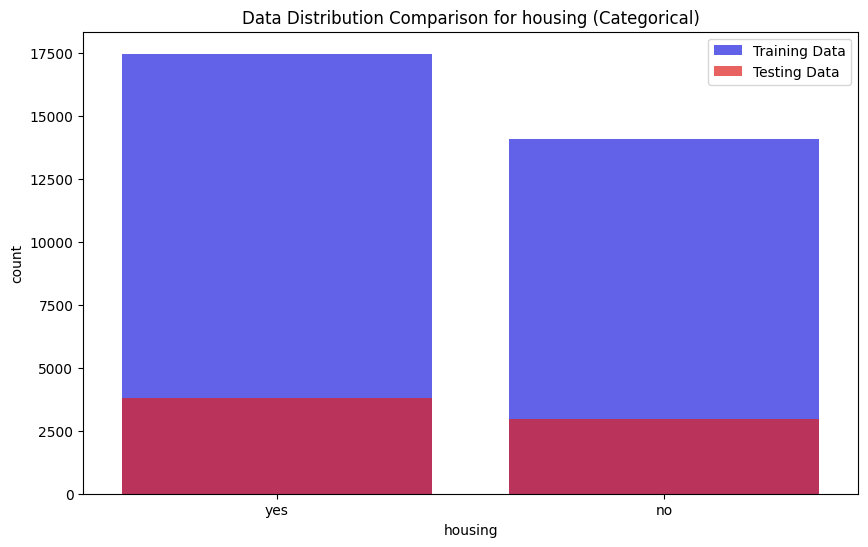

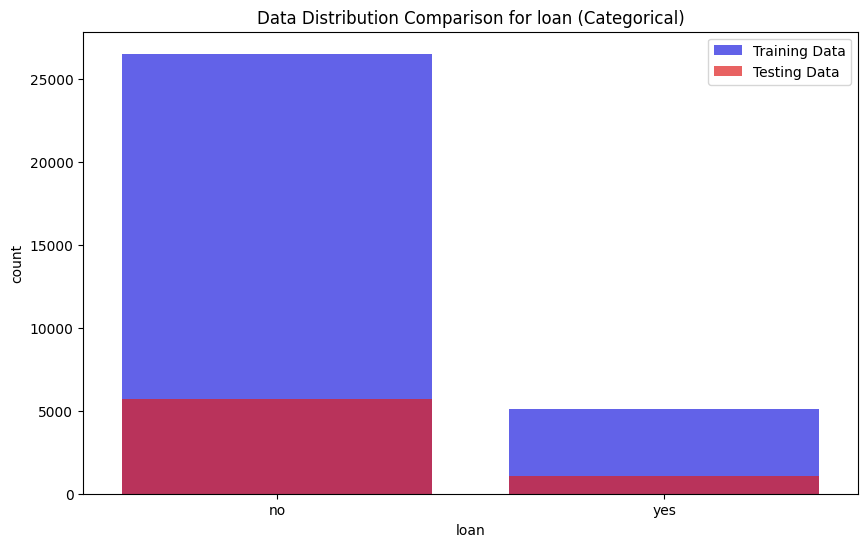

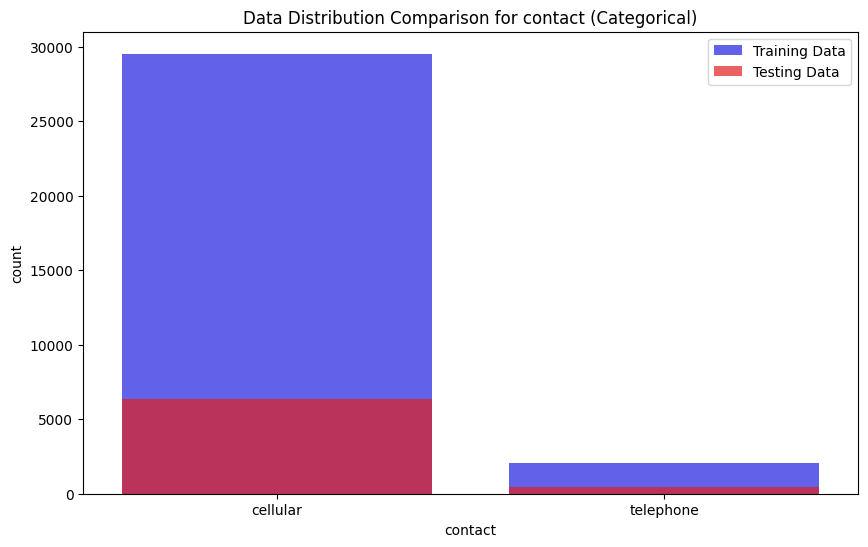

<ipython-input-78-a0e4b0a9f6b8>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[col], color='blue', label='Training Data', shade=True)
<ipython-input-78-a0e4b0a9f6b8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_test[col], color='red', label='Testing Data', shade=True)


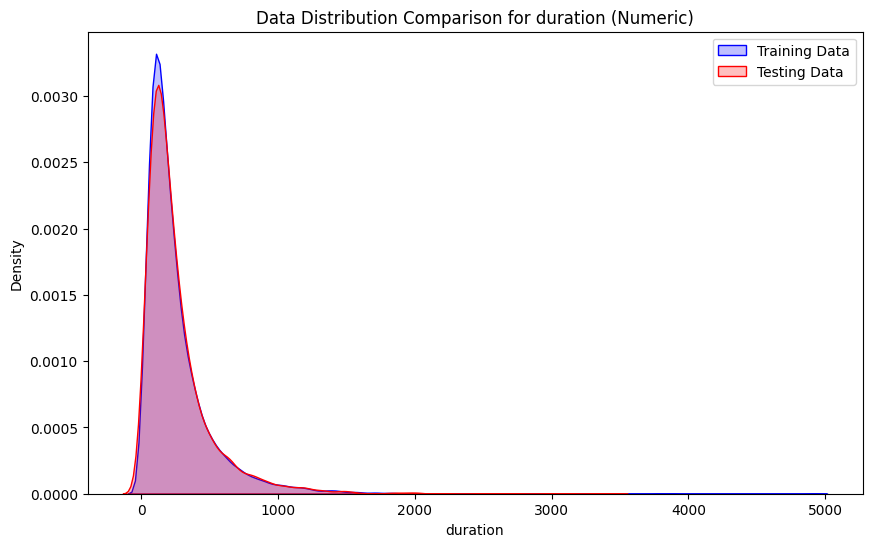

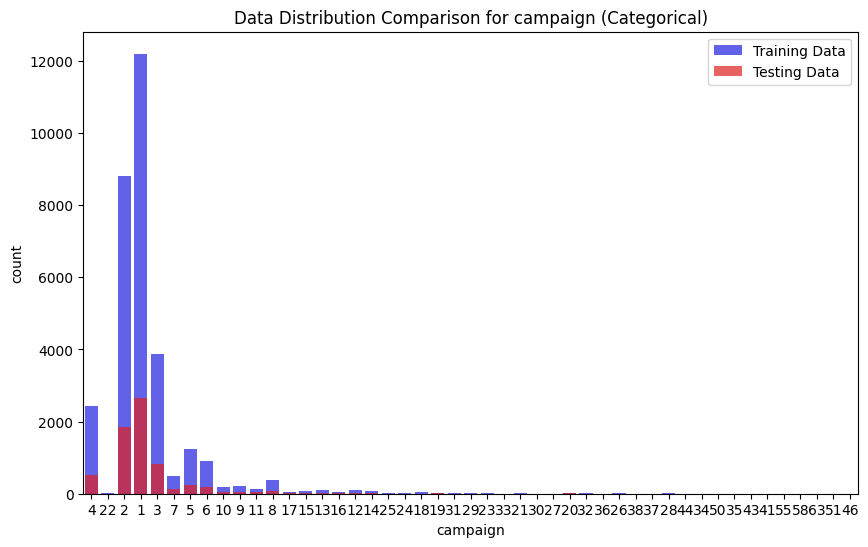

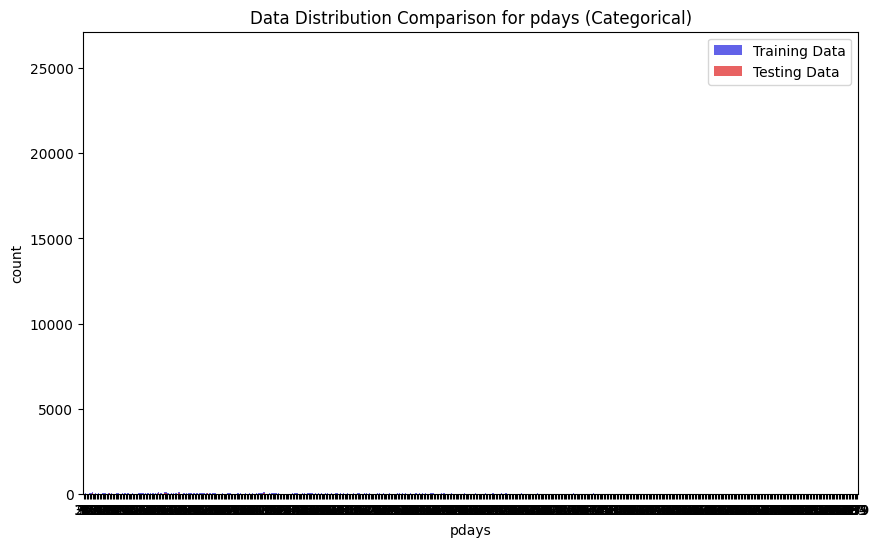

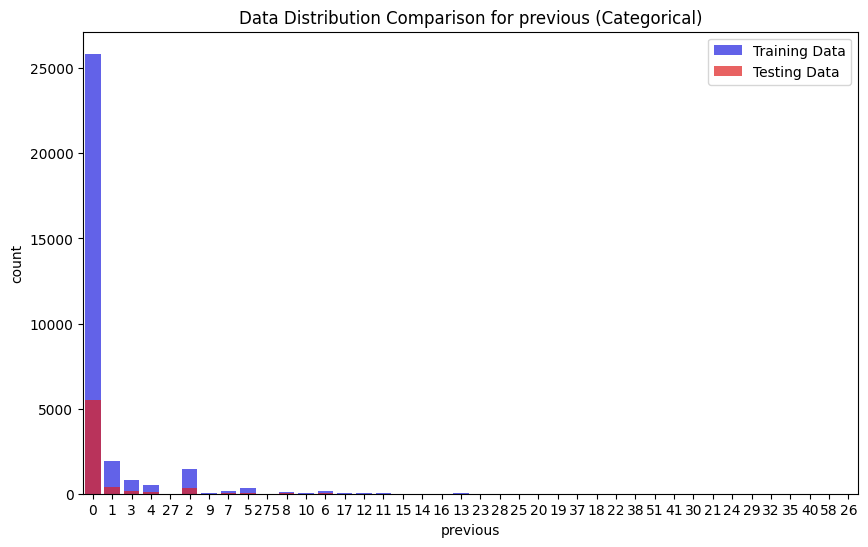

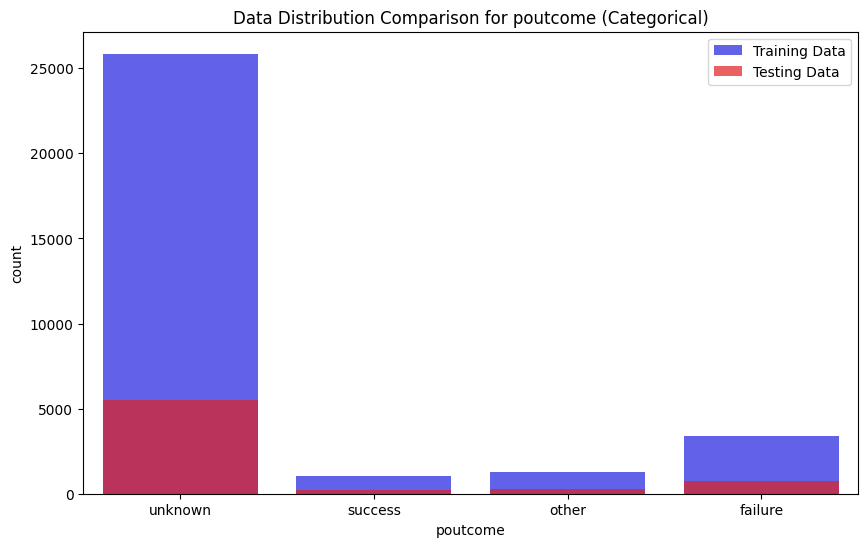

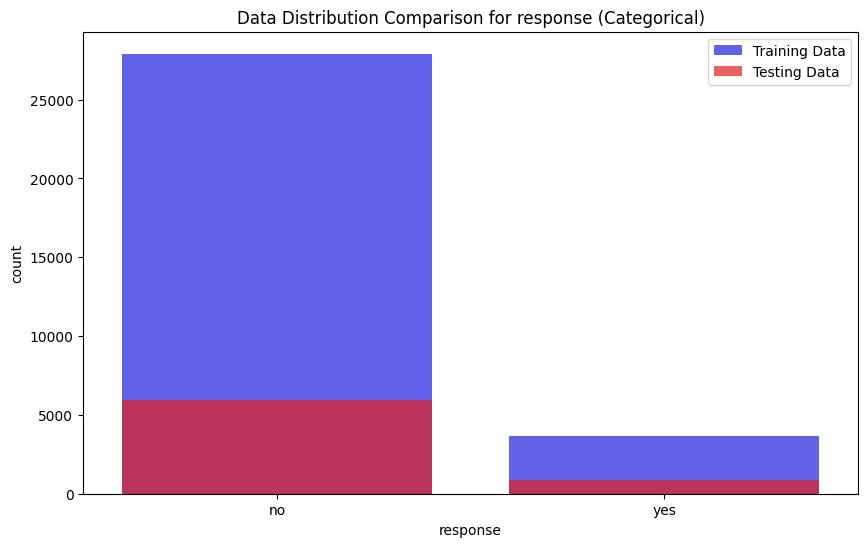

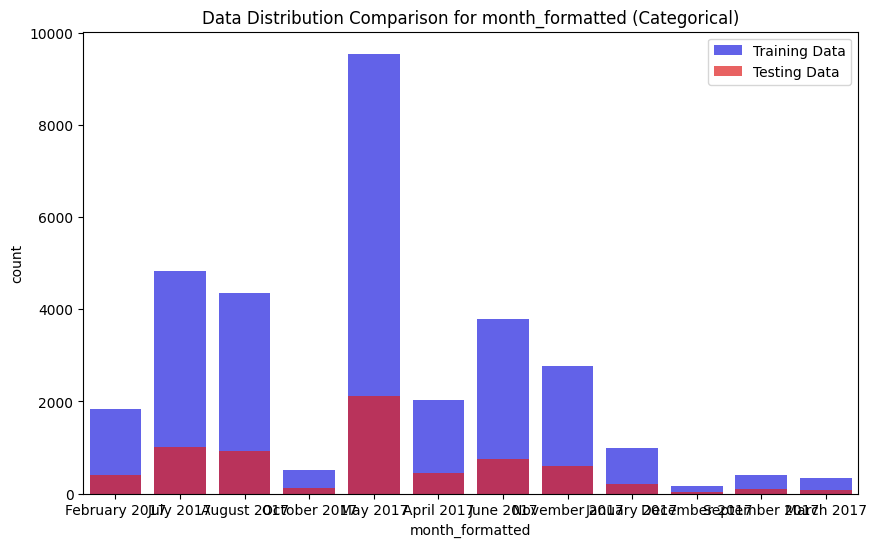

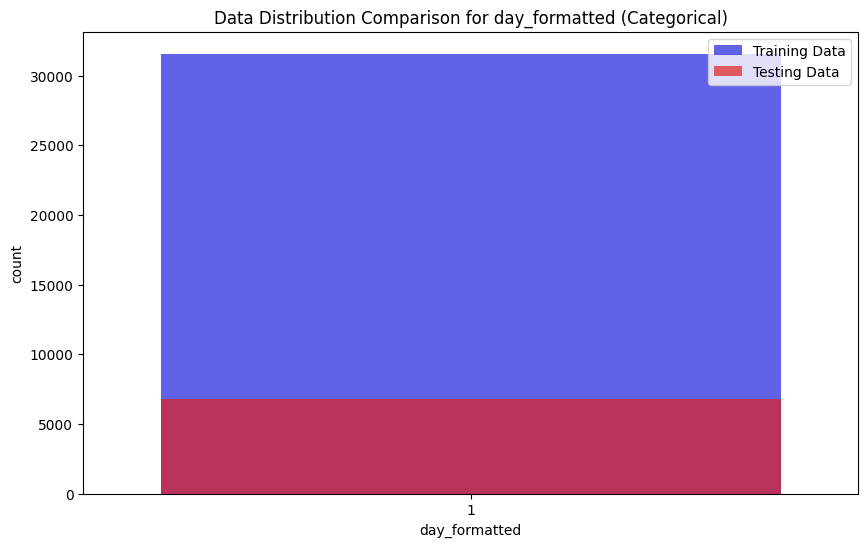

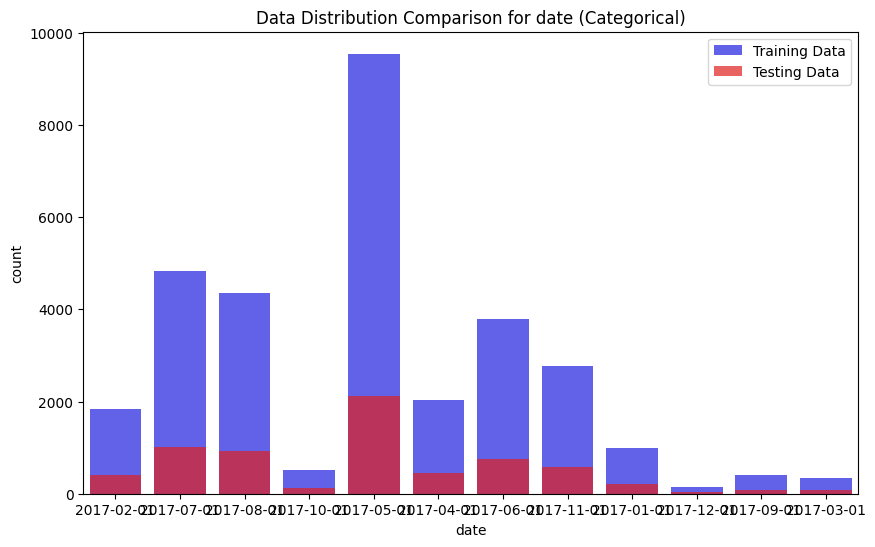

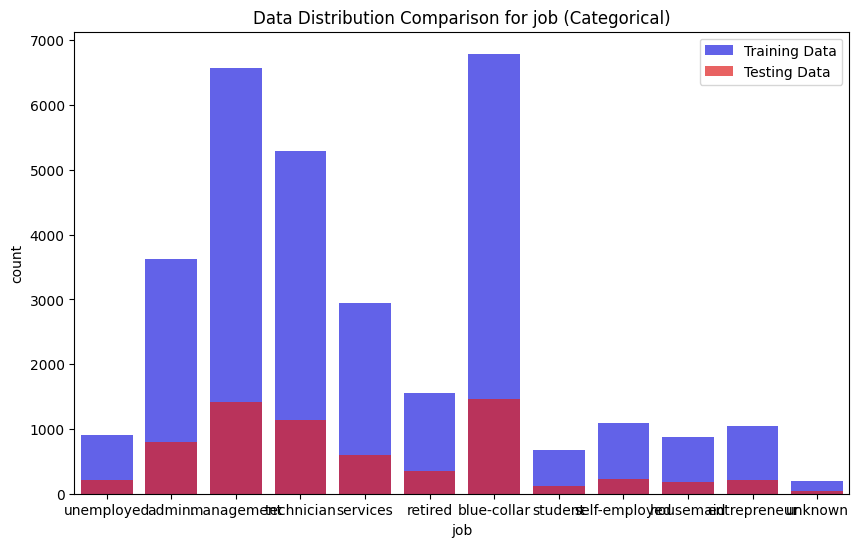

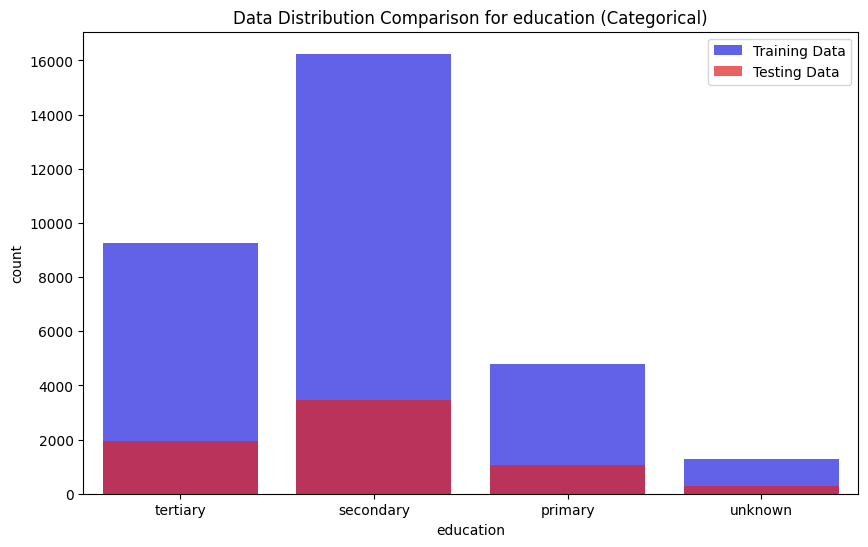

In [ ]:
# Data Distribution Comparison for Numeric and Categorical Columns
for col in df_train.columns:
    if df_train[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df_train[col], color='blue', label='Training Data', shade=True)
        sns.kdeplot(df_test[col], color='red', label='Testing Data', shade=True)
        plt.title(f'Data Distribution Comparison for {col} (Numeric)')
        plt.legend()
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df_train, color='blue', alpha=0.7, label='Training Data')
        sns.countplot(x=col, data=df_test, color='red', alpha=0.7, label='Testing Data')
        plt.title(f'Data Distribution Comparison for {col} (Categorical)')
        plt.legend()
        plt.show()

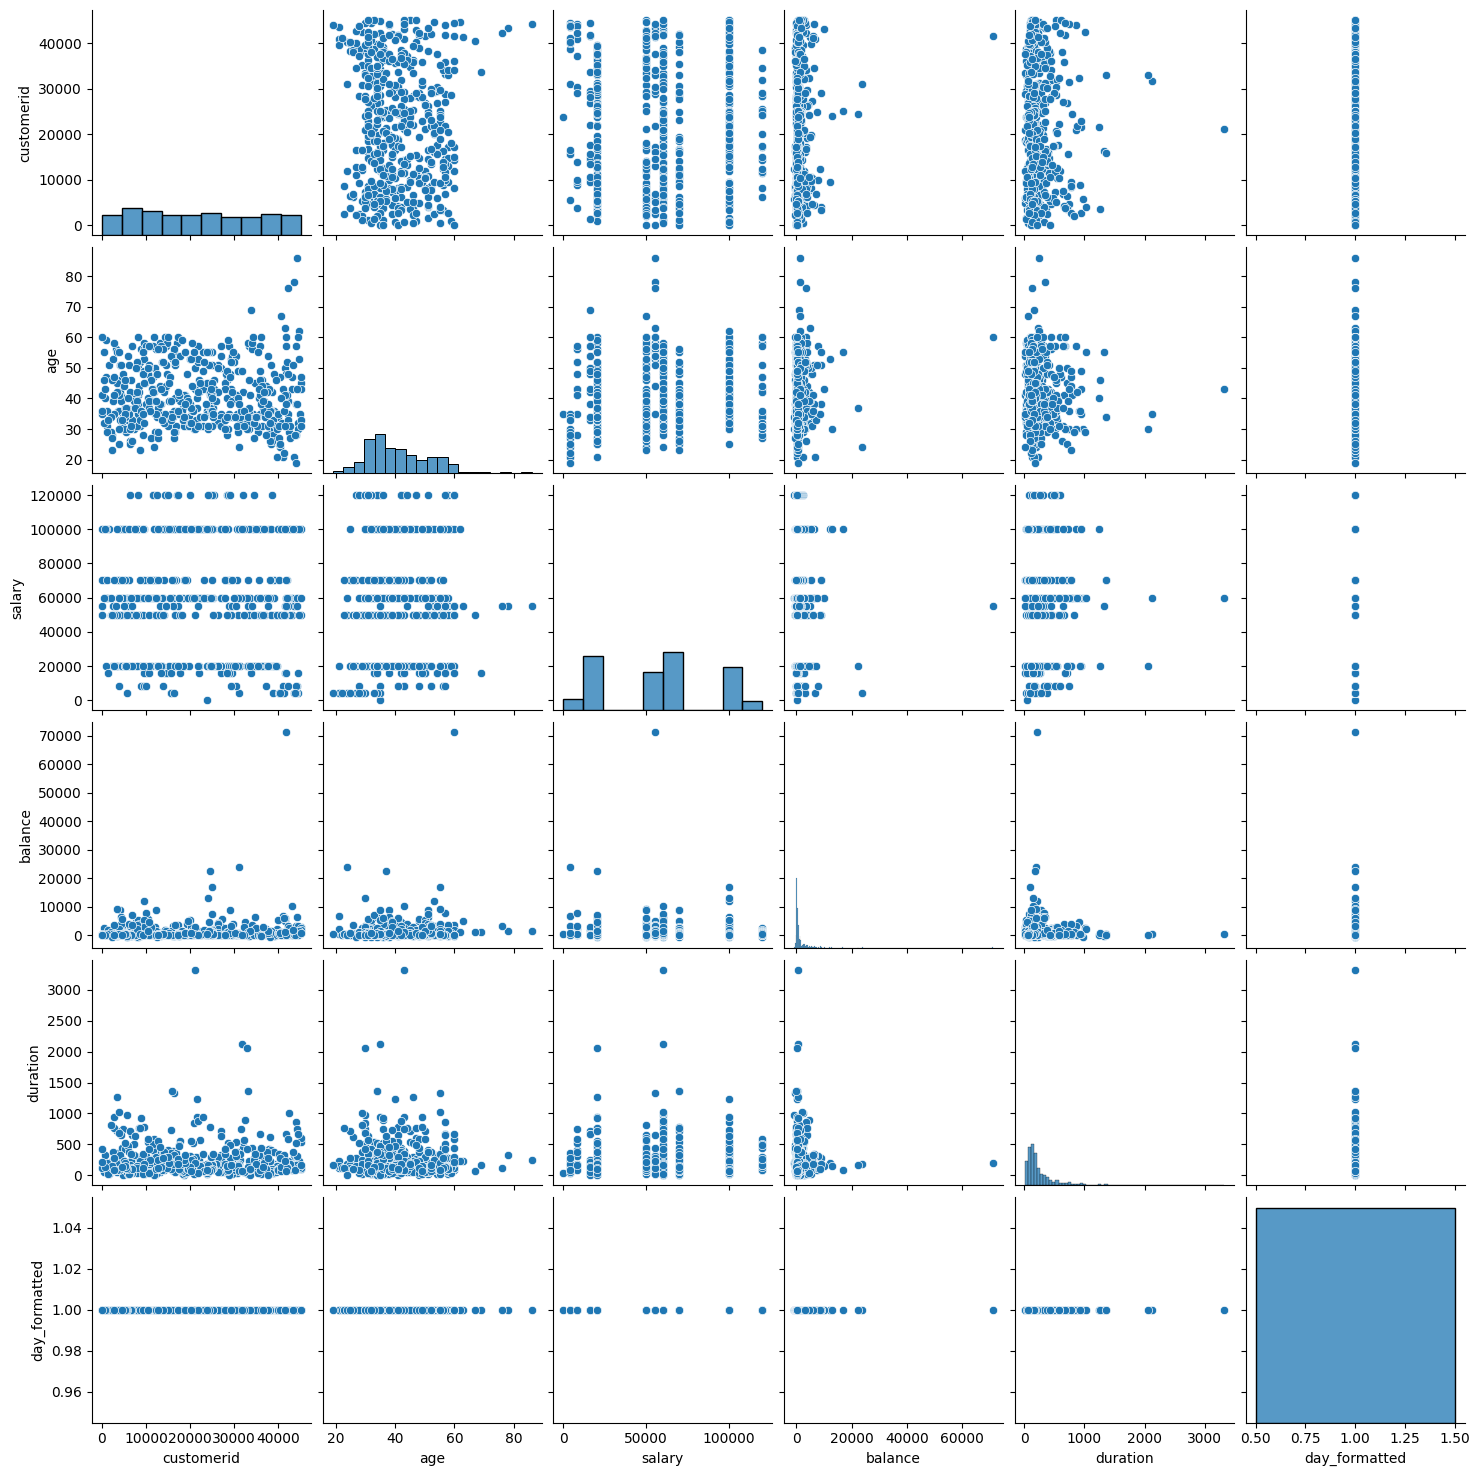

In [ ]:
# Create a pair plot for numerical columns
sns.pairplot(df_train.sample(500))
plt.show()

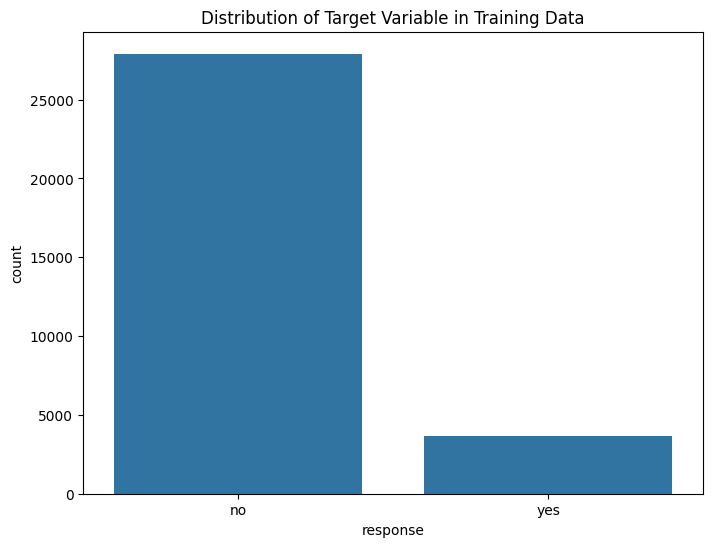

In [ ]:
# Target Variable Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='response', data=df_train)
plt.title('Distribution of Target Variable in Training Data')
plt.show()

In [ ]:
# @title Feature Engineering {"display-mode":"both"}


In [ ]:
# dividing the age into categories
df_train['age_group'] = pd.cut(df_train['age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

In [ ]:
# interaction between age and the salary
df_train['age_salary_interaction'] = df_train['age'] * df_train['salary']

In [ ]:
#one-hot encoding marital column
df_train = pd.get_dummies(df_train, columns=['marital'], prefix=['marital'])

In [ ]:
# making a relation between the avg-salary and joining the campaign
avg_salary_respondents = df_train[df_train['response'] == 'yes']['salary'].mean()
# New Feature
df_train['salary_response_ratio'] = df_train['salary'] / avg_salary_respondents

In [ ]:
#converts the categorical values in the education column into numerical
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary', 'unknown']])
df_train['education_encoded'] = encoder.fit_transform(df_train[['education']])

In [ ]:
print(df_train['education_encoded'].unique())

[2. 1. 0. 3.]


In [ ]:
df_train

,customerid,age,salary,balance,targeted,default,housing,loan,contact,duration,...,education,age_group,age_salary_interaction,marital_divorced,marital_married,marital_single,salary_response_ratio,day_of_week,week_of_year,education_encoded
30858,30931,43,8000,58,yes,no,yes,no,cellular,48.0,...,tertiary,Adult,344000,False,True,False,0.136005,2,5,2.0
18346,18394,38,50000,137,yes,no,yes,no,cellular,27.0,...,secondary,Adult,1900000,False,True,False,0.85003,5,26,1.0
40538,40626,46,100000,242,yes,no,no,no,cellular,120.0,...,tertiary,Adult,4600000,False,True,False,1.700061,1,31,2.0
44971,45072,27,8000,771,yes,no,no,no,cellular,181.0,...,secondary,Young,216000,False,False,True,0.136005,6,39,1.0
14286,14326,34,100000,344,no,no,no,no,cellular,56.0,...,tertiary,Adult,3400000,False,False,True,1.700061,5,26,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11319,57,20000,1236,yes,no,no,no,cellular,152.0,...,primary,Middle-aged,1140000,False,True,False,0.340012,3,22,0.0
44732,44832,46,100000,624,no,no,no,no,cellular,336.0,...,tertiary,Adult,4600000,True,False,False,1.700061,4,35,2.0
38158,38241,28,20000,-42,yes,no,yes,no,cellular,192.0,...,secondary,Young,560000,False,True,False,0.340012,0,18,1.0
860,865,37,20000,693,yes,no,yes,no,cellular,327.0,...,primary,Adult,740000,False,True,False,0.340012,0,18,0.0


In [ ]:
import pandas as pd

# and 'response' is a column with 'yes' and 'no' values

# Convert 'response' to numerical (0 and 1)
df_train['response_encoded'] = df_train['response'].map({'no': 0, 'yes': 1})

numerical_features = ['age', 'salary', 'balance', 'duration', 'education_encoded', 'age_salary_interaction', 'salary_response_ratio']
# Include the encoded 'response' column for correlation calculation
correlations = df_train[numerical_features + ['response_encoded']].corr()
print(correlations)

                             age    salary   balance  duration  \
age                     1.000000  0.025404  0.095444 -0.001988   
salary                  0.025404  1.000000  0.053790 -0.007551   
balance                 0.095444  0.053790  1.000000  0.026497   
duration               -0.001988 -0.007551  0.026497  1.000000   
education_encoded      -0.106895  0.430312  0.062304  0.002614   
age_salary_interaction  0.418574  0.892471  0.090472 -0.006264   
salary_response_ratio   0.025404  1.000000  0.053790 -0.007551   
response_encoded        0.027482  0.021003  0.053908  0.387995   

                        education_encoded  age_salary_interaction  \
age                             -0.106895                0.418574   
salary                           0.430312                0.892471   
balance                          0.062304                0.090472   
duration                         0.002614               -0.006264   
education_encoded                1.000000                0.3

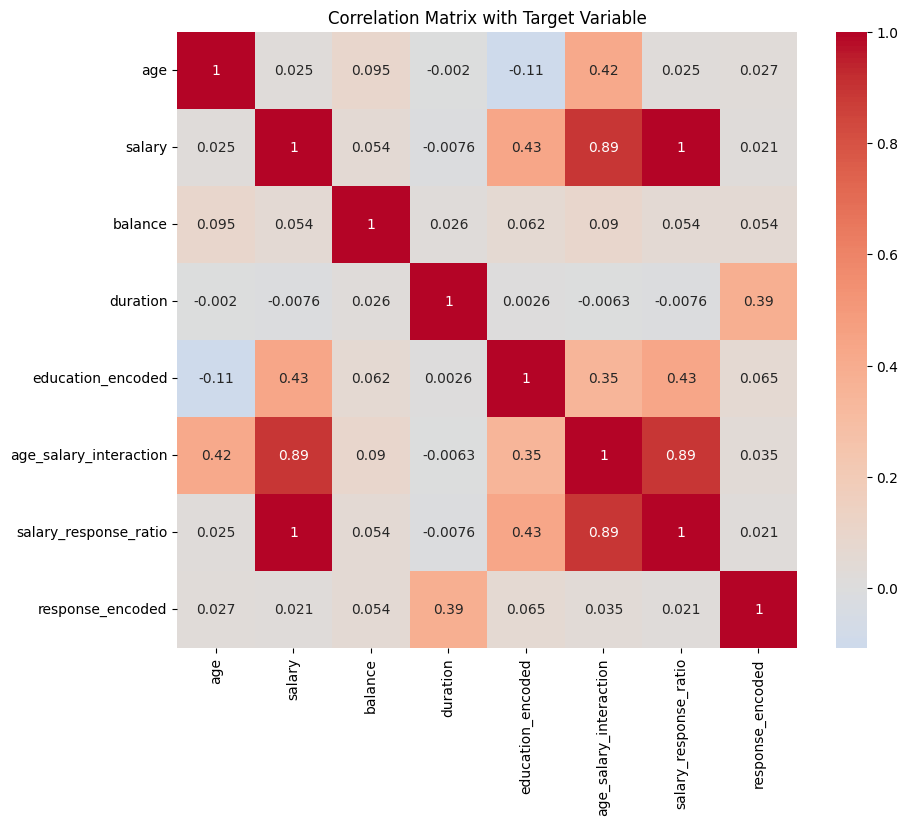

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix with Target Variable')
plt.show()

In [ ]:
#USING RAW FEATURES AND FLAGS
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

# Calculate aggregates only on the training data
positive_responses_train = df_train[df_train['response'] == 'yes']  # Filter for positive responses

# Calculate the maximum and average duration and salary for positive responses
max_duration_train = positive_responses_train['duration'].max()
avg_duration_train = positive_responses_train['duration'].mean()
max_salary_train = positive_responses_train['salary'].max()
avg_salary_train = positive_responses_train['salary'].mean()

# Define a transformer class to add new features based on the calculated aggregates
class FeatureFlagTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, max_duration, avg_duration, max_salary, avg_salary):
        self.max_duration = max_duration
        self.avg_duration = avg_duration
        self.max_salary = max_salary
        self.avg_salary = avg_salary

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, flag):
        # Create flags based on whether values exceed the calculated aggregates
        flag = flag.copy()
        flag['duration_exceeds_max'] = (flag['duration'] > self.max_duration).astype(int)
        flag['duration_exceeds_avg'] = (flag['duration'] > self.avg_duration).astype(int)
        flag['salary_exceeds_max'] = (flag['salary'] > self.max_salary).astype(int)
        flag['salary_exceeds_avg'] = (flag['salary'] > self.avg_salary).astype(int)
        return flag

# Initialize the transformer with calculated values from the training data
feature_flag_transformer = FeatureFlagTransformer(
    max_duration=max_duration_train,
    avg_duration=avg_duration_train,
    max_salary=max_salary_train,
    avg_salary=avg_salary_train
)

# Transform the train, validation, and test datasets
df_train_transformed = feature_flag_transformer.transform(df_train)
df_val_transformed = feature_flag_transformer.transform(df_val)
df_test_transformed = feature_flag_transformer.transform(df_test)

# Display the first few rows of the transformed training dataset
df_train_transformed.head()


,customerid,age,salary,balance,targeted,default,housing,loan,contact,duration,...,marital_single,salary_response_ratio,day_of_week,week_of_year,education_encoded,response_encoded,duration_exceeds_max,duration_exceeds_avg,salary_exceeds_max,salary_exceeds_avg
30858,30931,43,8000,58,yes,no,yes,no,cellular,48.0,...,False,0.136005,2,5,2.0,0,0,0,0,0
18346,18394,38,50000,137,yes,no,yes,no,cellular,27.0,...,False,0.85003,5,26,1.0,0,0,0,0,0
40538,40626,46,100000,242,yes,no,no,no,cellular,120.0,...,False,1.700061,1,31,2.0,1,0,0,0,1
44971,45072,27,8000,771,yes,no,no,no,cellular,181.0,...,True,0.136005,6,39,1.0,1,0,0,0,0
14286,14326,34,100000,344,no,no,no,no,cellular,56.0,...,True,1.700061,5,26,2.0,0,0,0,0,1


In [ ]:

# Identify datetime columns in the DataFrame
datetime_columns = df_train_transformed.select_dtypes(include=['datetime64']).columns
# Convert datetime columns to numerical features
for col in datetime_columns:
    # Extract year, month, day, and day of week from each datetime column
    df_train_transformed[f'{col}_year'] = df_train_transformed[col].dt.year
    df_train_transformed[f'{col}_month'] = df_train_transformed[col].dt.month
    df_train_transformed[f'{col}_day'] = df_train_transformed[col].dt.day
    df_train_transformed[f'{col}_weekday'] = df_train_transformed[col].dt.weekday



# Drop the original datetime columns
df_train_transformed.drop(datetime_columns, axis=1, inplace=True)

# Display the first few rows to verify the transformation
df_train_transformed.head()


,customerid,age,salary,balance,targeted,default,housing,loan,contact,duration,...,education_encoded,response_encoded,duration_exceeds_max,duration_exceeds_avg,salary_exceeds_max,salary_exceeds_avg,date_year,date_month,date_day,date_weekday
30858,30931,43,8000,58,yes,no,yes,no,cellular,48.0,...,2.0,0,0,0,0,0,2017,2,1,2
18346,18394,38,50000,137,yes,no,yes,no,cellular,27.0,...,1.0,0,0,0,0,0,2017,7,1,5
40538,40626,46,100000,242,yes,no,no,no,cellular,120.0,...,2.0,1,0,0,0,1,2017,8,1,1
44971,45072,27,8000,771,yes,no,no,no,cellular,181.0,...,1.0,1,0,0,0,0,2017,10,1,6
14286,14326,34,100000,344,no,no,no,no,cellular,56.0,...,2.0,0,0,0,0,1,2017,7,1,5


In [ ]:
df_train_transformed

,customerid,age,salary,balance,targeted,default,housing,loan,contact,duration,...,education_encoded,response_encoded,duration_exceeds_max,duration_exceeds_avg,salary_exceeds_max,salary_exceeds_avg,date_year,date_month,date_day,date_weekday
30858,30931,43,8000,58,yes,no,yes,no,cellular,48.0,...,2.0,0,0,0,0,0,2017,2,1,2
18346,18394,38,50000,137,yes,no,yes,no,cellular,27.0,...,1.0,0,0,0,0,0,2017,7,1,5
40538,40626,46,100000,242,yes,no,no,no,cellular,120.0,...,2.0,1,0,0,0,1,2017,8,1,1
44971,45072,27,8000,771,yes,no,no,no,cellular,181.0,...,1.0,1,0,0,0,0,2017,10,1,6
14286,14326,34,100000,344,no,no,no,no,cellular,56.0,...,2.0,0,0,0,0,1,2017,7,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11319,57,20000,1236,yes,no,no,no,cellular,152.0,...,0.0,0,0,0,0,0,2017,6,1,3
44732,44832,46,100000,624,no,no,no,no,cellular,336.0,...,2.0,1,0,0,0,1,2017,9,1,4
38158,38241,28,20000,-42,yes,no,yes,no,cellular,192.0,...,1.0,0,0,0,0,0,2017,5,1,0
860,865,37,20000,693,yes,no,yes,no,cellular,327.0,...,0.0,0,0,0,0,0,2017,5,1,0


In [ ]:
df_train_transformed['log_salary'] = np.log1p(df_train_transformed['salary'])  # log1p to handle zero values


In [ ]:

# Interaction Features: Create new features by combining existing ones. For example, you could create an interaction feature between 'age_group' and 'education_encoded' to capture potential differences in response based on both age and education level.

df_train_transformed['age_education_interaction'] = df_train_transformed['age_group'].astype(str) + '_' + df_train_transformed['education_encoded'].astype(str)

# Polynomial Features: Generate polynomial features from existing numerical features to capture non-linear relationships. You can use sklearn's PolynomialFeatures for this.

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(df_train_transformed[['age', 'salary']])


# Binning or Discretization: Group continuous variables into bins to create categorical features. This can help capture non-linear relationships and improve model performance.

df_train_transformed['balance_bins'] = pd.cut(df_train_transformed['balance'], bins=5, labels=False)

# Feature Scaling: Scale numerical features to a common range to improve the performance of some machine learning algorithms. You can use StandardScaler or MinMaxScaler from sklearn.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train_transformed[['age', 'salary']] = scaler.fit_transform(df_train_transformed[['age', 'salary']])

# Handling Categorical Features: Use one-hot encoding or other encoding techniques to convert categorical features into numerical representations that can be used by machine learning models.

df_train_transformed = pd.get_dummies(df_train_transformed, columns=['job', 'contact'], drop_first=True)


In [ ]:
df_train_transformed[['age', 'salary']]

,age,salary
30858,0.197390,-1.526247
18346,-0.275537,-0.217044
40538,0.481146,1.341531
44971,-1.315976,-1.526247
14286,-0.653878,1.341531
...,...,...
11284,1.521585,-1.152189
44732,0.481146,1.341531
38158,-1.221390,-1.152189
860,-0.370122,-1.152189


In [ ]:
df_train_transformed['loan_encoded'] = df_train_transformed['loan'].map({'no': 0, 'yes': 1})
df_train_transformed


,customerid,age,salary,balance,targeted,default,housing,loan,duration,campaign,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_telephone,loan_encoded
30858,30931,0.197390,-1.526247,58,yes,no,yes,no,48.0,4,...,False,False,False,False,False,False,True,False,False,0
18346,18394,-0.275537,-0.217044,137,yes,no,yes,no,27.0,22,...,False,False,False,False,False,False,False,False,False,0
40538,40626,0.481146,1.341531,242,yes,no,no,no,120.0,2,...,True,False,False,False,False,False,False,False,False,0
44971,45072,-1.315976,-1.526247,771,yes,no,no,no,181.0,1,...,False,False,False,False,False,False,True,False,False,0
14286,14326,-0.653878,1.341531,344,no,no,no,no,56.0,3,...,True,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11319,1.521585,-1.152189,1236,yes,no,no,no,152.0,9,...,False,False,False,False,False,False,False,False,False,0
44732,44832,0.481146,1.341531,624,no,no,no,no,336.0,2,...,True,False,False,False,False,False,False,False,False,0
38158,38241,-1.221390,-1.152189,-42,yes,no,yes,no,192.0,1,...,False,False,False,False,False,False,False,False,False,0
860,865,-0.370122,-1.152189,693,yes,no,yes,no,327.0,3,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
df_test_transformed


,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,...,response,month_formatted,day_formatted,date,job,education,duration_exceeds_max,duration_exceeds_avg,salary_exceeds_max,salary_exceeds_avg
6939,6965,33,20000,625,married,yes,no,yes,no,cellular,...,no,May 2017,1,2017-05-01,blue-collar,secondary,0,0,0,0
20718,20771,58,55000,1669,married,yes,no,no,no,cellular,...,no,August 2017,1,2017-08-01,retired,tertiary,0,0,0,0
34781,34857,33,50000,-18,divorced,yes,yes,yes,no,cellular,...,no,May 2017,1,2017-05-01,admin.,secondary,0,0,0,0
24654,24719,46,50000,4958,married,yes,no,yes,no,cellular,...,no,November 2017,1,2017-11-01,admin.,secondary,0,0,0,0
44883,44984,35,20000,172,divorced,no,no,no,no,cellular,...,no,October 2017,1,2017-10-01,blue-collar,unknown,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,7871,41,50000,8238,married,yes,no,yes,yes,cellular,...,no,May 2017,1,2017-05-01,admin.,secondary,0,0,0,0
37002,37081,47,20000,4227,married,yes,no,yes,no,cellular,...,yes,May 2017,1,2017-05-01,blue-collar,primary,0,1,0,0
37645,37725,28,20000,206,married,yes,no,yes,no,cellular,...,no,May 2017,1,2017-05-01,blue-collar,primary,0,0,0,0
532,535,52,50000,1236,married,yes,no,yes,no,cellular,...,no,May 2017,1,2017-05-01,admin.,secondary,0,0,0,0


In [ ]:

# #OVERSAMPLING TO HANDLE IMBALANCE
# from imblearn.over_sampling import RandomOverSampler
# #
# # Assuming 'response_encoded' is your target variable column
# imb_sampling = df_train_transformed.drop('response_encoded', axis=1)
# imb_sampling_2 = df_train_transformed['response_encoded']

# # Instantiate RandomOverSampler
# oversampler = RandomOverSampler(random_state=42)

# # Fit and resample the data
# imb_resampled, imb_resampled_2 = oversampler.fit_resample(imb_sampling, imb_sampling_2)

# # Check the class distribution after oversampling
# from collections import Counter
# print(Counter(imb_resampled_2))


In [ ]:
# # VISUALIZATION

# # Visualize the class distribution after oversampling
# plt.figure(figsize=(8, 6))
# sns.countplot(x=imb_resampled_2)
# plt.title('Class Distribution After Oversampling')
# plt.xlabel('Response (Encoded)')
# plt.ylabel('Count')
# plt.show()


## ***MODELLING***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
# Assuming 'response_encoded' is your target variable
X_modelling_logistic_train = df_train_transformed.drop(columns=['response_encoded'])
y_modelling_logistic_train = df_train_transformed['response_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_modelling_logistic_train, y_modelling_logistic_train, test_size=0.3, random_state=42)

# Check the types of columns in your training data
print(X_modelling_logistic_train.dtypes)

# Identify columns that are still object type (which indicates they are categorical)
categorical_columns = X_modelling_logistic_train.select_dtypes(include=['object']).columns
print("Categorical columns that need encoding:", categorical_columns)


customerid                      Int64
age                           float64
salary                        float64
balance                         Int64
targeted                       object
default                        object
housing                        object
loan                           object
duration                      float64
campaign                       object
pdays                          object
previous                       object
poutcome                       object
response                       object
month_formatted                object
day_formatted                   int32
education                      object
age_group                    category
age_salary_interaction          Int64
marital_divorced                 bool
marital_married                  bool
marital_single                   bool
salary_response_ratio         Float64
day_of_week                     int32
week_of_year                   UInt32
education_encoded             float64
duration_exc

In [ ]:
# Check the unique values in the target variable
print(y_modelling_logistic_train.unique())

# If the target variable is not numeric, map it to numeric values
if y_modelling_logistic_train.dtype == 'object':
    y_modelling_logistic_train = y_modelling_logistic_train.map({'no': 0, 'yes': 1})
    y_modelling_logistic_test = y_modelling_logistic_test.map({'no': 0, 'yes': 1})


[0 1]


In [ ]:
# List of columns that you want to encode
columns_to_encode = ['targeted', 'default', 'housing', 'loan', 'campaign', 'pdays',
                     'previous', 'poutcome', 'response', 'month_formatted', 'education',
                     'age_education_interaction']

# Check which of these columns are present in the training dataset
existing_columns_train = [col for col in columns_to_encode if col in X_modelling_logistic_train.columns]

# Apply one-hot encoding to the existing categorical columns in the training dataset
if existing_columns_train:
    X_modelling_logistic_train = pd.get_dummies(X_modelling_logistic_train, columns=existing_columns_train, drop_first=True)
else:
    print("No columns to encode in the training dataset.")

# Check which of these columns are present in the test dataset
existing_columns_test = [col for col in columns_to_encode if col in X_test.columns]

# Apply one-hot encoding to the existing categorical columns in the test dataset
if existing_columns_test:
    X_test = pd.get_dummies(X_test, columns=existing_columns_test, drop_first=True)
else:
    print("No columns to encode in the test dataset.")

# Ensure that training and test sets have the same columns after encoding
X_modelling_logistic_train, X_test = X_modelling_logistic_train.align(X_test, join='left', axis=1, fill_value=0)


No columns to encode in the training dataset.


In [ ]:
# Apply one-hot encoding to all categorical variables
X_modelling_logistic_train = pd.get_dummies(X_modelling_logistic_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that training and test sets have the same columns after encoding
X_modelling_logistic_train, X_test = X_modelling_logistic_train.align(X_test, join='left', axis=1, fill_value=0)


In [ ]:
# Instantiate and fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_modelling_logistic_train, y_modelling_logistic_train)

# Make predictions
y_pred = log_reg.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


              precision    recall  f1-score   support

           0       0.91      0.98      0.95      8411
           1       0.62      0.26      0.37      1063

    accuracy                           0.90      9474
   macro avg       0.77      0.62      0.66      9474
weighted avg       0.88      0.90      0.88      9474

[[8239  172]
 [ 784  279]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under-Sampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_modelling_logistic_train, y_modelling_logistic_train)

# Train the model with the resampled data
log_reg_under = LogisticRegression(max_iter=1000, random_state=42)
log_reg_under.fit(X_resampled, y_resampled)

# Make predictions and evaluate
y_pred_under = log_reg_under.predict(X_test)
print(classification_report(y_test, y_pred_under))
cm_under = confusion_matrix(y_test, y_pred_under)
print(cm_under)


              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8411
           1       0.37      0.87      0.52      1063

    accuracy                           0.82      9474
   macro avg       0.68      0.84      0.70      9474
weighted avg       0.91      0.82      0.85      9474

[[6842 1569]
 [ 140  923]]


In [ ]:
import numpy as np

# Get predicted probabilities
y_pred_prob = log_reg_under.predict_proba(X_test)[:, 1]

# Define a range of thresholds to evaluate
thresholds = np.arange(0.1, 1.0, 0.1)

for threshold in thresholds:
    # Apply the threshold to the predicted probabilities
    y_pred_threshold = np.where(y_pred_prob > threshold, 1, 0)

    # Evaluate the model at this threshold
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred_threshold))
    print(confusion_matrix(y_test, y_pred_threshold))
    print("\n")


Threshold: 0.1
              precision    recall  f1-score   support

           0       1.00      0.41      0.58      8411
           1       0.18      1.00      0.30      1063

    accuracy                           0.48      9474
   macro avg       0.59      0.70      0.44      9474
weighted avg       0.91      0.48      0.55      9474

[[3456 4955]
 [   4 1059]]


Threshold: 0.2
              precision    recall  f1-score   support

           0       1.00      0.57      0.72      8411
           1       0.22      0.98      0.36      1063

    accuracy                           0.62      9474
   macro avg       0.61      0.78      0.54      9474
weighted avg       0.91      0.62      0.68      9474

[[4793 3618]
 [  20 1043]]


Threshold: 0.30000000000000004
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      8411
           1       0.27      0.95      0.42      1063

    accuracy                           0.70      9474
   macro 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the resampled data
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)


In [ ]:
# Evaluate the model performance
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8411
           1       0.94      1.00      0.97      1063

    accuracy                           0.99      9474
   macro avg       0.97      1.00      0.98      9474
weighted avg       0.99      0.99      0.99      9474

[[8343   68]
 [   0 1063]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Instantiate the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the resampled data
gb_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)


In [ ]:
# Evaluate the model performance
print(classification_report(y_test, y_pred_gb))
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8411
           1       1.00      1.00      1.00      1063

    accuracy                           1.00      9474
   macro avg       1.00      1.00      1.00      9474
weighted avg       1.00      1.00      1.00      9474

[[8411    0]
 [   0 1063]]


# **FEATURE** **IMPORTANCE** **ANALYSIS**

In [ ]:
# Train the model first to get feature importances
gb_model.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = pd.Series(gb_model.feature_importances_, index=X_resampled.columns)

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Display the top 10 most important features
print("Top 10 Important Features:")
print(feature_importances.head(10))


Top 10 Important Features:
response_yes              1.000000e+00
customerid                4.238845e-14
balance                   2.677098e-14
age_salary_interaction    6.769297e-15
duration                  5.285728e-15
age                       0.000000e+00
pdays_336                 0.000000e+00
pdays_338                 0.000000e+00
pdays_337                 0.000000e+00
pdays_337                 0.000000e+00
dtype: float64


In [ ]:
# Select the top N features (e.g., top 10)
top_features = feature_importances.head(10).index

# Create a new dataset with only these top features
X_resampled_top = X_resampled[top_features]
X_test_top = X_test[top_features]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Remove 'response_yes' from the feature set
X_resampled_no_response = X_resampled.drop(columns=['response_yes'])
X_modelling_logistic_test_no_response = X_test.drop(columns=['response_yes'])

# Re-train and cross-validate using the remaining features
gb_model_no_response = GradientBoostingClassifier(random_state=42)
cv_scores_no_response = cross_val_score(gb_model_no_response, X_resampled_no_response, y_resampled, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores (without response_yes):", cv_scores_no_response)
print("Mean cross-validation score (without response_yes):", cv_scores_no_response.mean())


Cross-validation scores (without response_yes): [0.88760218 0.87525562 0.87184731 0.88411725 0.89025222]
Mean cross-validation score (without response_yes): 0.8818149144949098


In [ ]:
# Instantiate the Gradient Boosting model
final_gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the entire resampled training data (without response_yes)
final_gb_model.fit(X_resampled_no_response, y_resampled)


GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_final_pred = final_gb_model.predict(X_modelling_logistic_test_no_response)

# Evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix

print("Final Model Performance on Test Set:")
print(classification_report(y_test, y_final_pred))
cm_final = confusion_matrix(y_test, y_final_pred)
print(cm_final)


Final Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      8411
           1       0.43      0.94      0.59      1063

    accuracy                           0.85      9474
   macro avg       0.71      0.89      0.75      9474
weighted avg       0.93      0.85      0.87      9474

[[7066 1345]
 [  62 1001]]


# ***  logistic regression with important features only***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Define the important features
important_features = [
    'customerid', 'balance', 'age_salary_interaction',
    'duration', 'age', 'pdays_331', 'pdays_330'
]

# Ensure the 'important_features' are used in the data for training and testing
X_resampled_important = X_resampled_no_response[important_features]
X_modelling_logistic_test_important = X_modelling_logistic_test_no_response[important_features]

# Instantiate the Logistic Regression model
log_reg_important = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the resampled data with important features
log_reg_important.fit(X_resampled_no_response[important_features], y_resampled)

# Make predictions on the test set
y_pred_log_reg_important = log_reg_important.predict(X_modelling_logistic_test_no_response[important_features])

# Evaluate the model performance
print("Logistic Regression Performance with Important Features:")
print(classification_report(y_test, y_pred_log_reg_important))
cm_log_reg_important = confusion_matrix(y_test, y_pred_log_reg_important)
print(cm_log_reg_important)


Logistic Regression Performance with Important Features:
              precision    recall  f1-score   support

           0       0.96      0.49      0.65      8411
           1       0.17      0.85      0.29      1063

    accuracy                           0.53      9474
   macro avg       0.57      0.67      0.47      9474
weighted avg       0.87      0.53      0.61      9474

[[4135 4276]
 [ 160  903]]


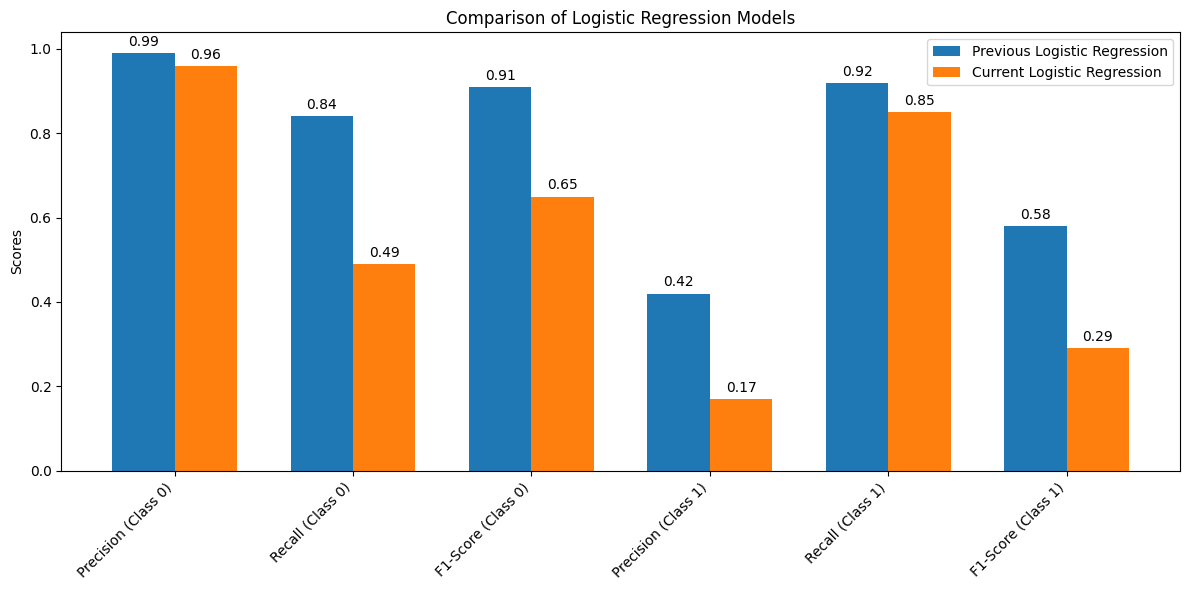

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
metrics = ['Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)',
           'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)']

previous_scores = [0.99, 0.84, 0.91, 0.42, 0.92, 0.58]  # Replace with previous model's scores
current_scores = [0.96, 0.49, 0.65, 0.17, 0.85, 0.29]   # Current model's scores

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, previous_scores, width, label='Previous Logistic Regression')
rects2 = ax.bar(x + width/2, current_scores, width, label='Current Logistic Regression')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text position
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**GRADIENT BOOST WITH IMP FEATURES**

**RANDOM FOREST WITH IMPORTANT FEATURES**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the Random Forest model
rf_model_important = RandomForestClassifier(random_state=42)

# Train the model on the resampled data with important features
rf_model_important.fit(X_resampled_important, y_resampled)

# Make predictions on the test set
y_pred_rf_important = rf_model_important.predict(X_modelling_logistic_test_important)

# Evaluate the model performance
print("Random Forest Performance with Important Features:")
print(classification_report(y_test, y_pred_rf_important))
cm_rf_important = confusion_matrix(y_test, y_pred_rf_important)
print(cm_rf_important)


Random Forest Performance with Important Features:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      8411
           1       0.46      1.00      0.63      1063

    accuracy                           0.87      9474
   macro avg       0.73      0.93      0.77      9474
weighted avg       0.94      0.87      0.89      9474

[[7151 1260]
 [   0 1063]]


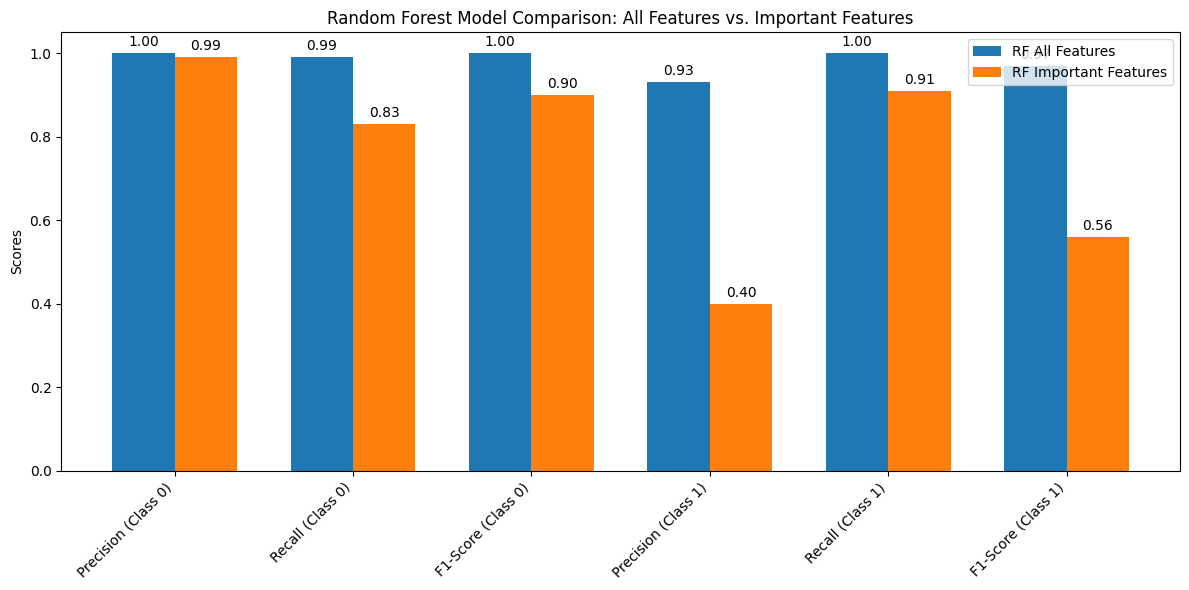

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for the earlier Random Forest model (using all features)
# Replace these with actual values if you have them saved
previous_rf_scores = [1.00, 0.99, 1.00, 0.93, 1.00, 0.97]  # Precision, Recall, F1-Score for Class 0 and 1

# Metrics for the recent Random Forest model (using important features)
current_rf_scores = [0.99, 0.83, 0.90, 0.40, 0.91, 0.56]   # Replace with the actual scores you just obtained

# Labels for the metrics
metrics = ['Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)',
           'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)']

# Define the x locations for the groups
x = np.arange(len(metrics))
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, previous_rf_scores, width, label='RF All Features')
rects2 = ax.bar(x + width/2, current_rf_scores, width, label='RF Important Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Random Forest Model Comparison: All Features vs. Important Features')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in rects1 and rects2, displaying its height
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the Gradient Boosting model
gb_model_important = GradientBoostingClassifier(random_state=42)

# Train the model on the resampled data with important features
gb_model_important.fit(X_resampled_important, y_resampled)

# Make predictions on the test set
y_pred_gb_important = gb_model_important.predict(X_modelling_logistic_test_important)

# Evaluate the model performance
print("Gradient Boosting Performance with Important Features:")
print(classification_report(y_test, y_pred_gb_important))
cm_gb_important = confusion_matrix(y_test, y_pred_gb_important)
print(cm_gb_important)


Gradient Boosting Performance with Important Features:
              precision    recall  f1-score   support

           0       0.99      0.83      0.91      8411
           1       0.42      0.94      0.58      1063

    accuracy                           0.85      9474
   macro avg       0.70      0.89      0.74      9474
weighted avg       0.93      0.85      0.87      9474

[[7018 1393]
 [  63 1000]]


In [ ]:
# Calculate correlation matrix
correlation_matrix = X_resampled.corrwith(y_resampled).abs()

# Sort correlations to identify features that are highly correlated with the target
correlation_matrix.sort_values(ascending=False)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
response_yes,1.000000
duration,0.459848
customerid,0.436823
duration_exceeds_avg,0.401232
pdays_-1,0.363121
...,...
previous_38,NaN
previous_40,NaN
previous_41,NaN
previous_51,NaN


In [ ]:
# Step 1: Remove the leaked features
# Removing 'response_yes' and any other highly correlated features
leaked_features = ['response_yes']
X_train_no_leak = X_modelling_logistic_train.drop(columns=leaked_features)
X_test_no_leak = X_test.drop(columns=leaked_features)

# Step 2: Recalculate the correlation matrix
correlation_matrix_no_leak = X_train_no_leak.corrwith(y_train).abs()
print("Correlation matrix after removing leaked features:")
print(correlation_matrix_no_leak.sort_values(ascending=False))

# Step 3: Retrain the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate the Random Forest model
rf_model_no_leak = RandomForestClassifier(random_state=42)

# Train the model without leaked features
rf_model_no_leak.fit(X_train_no_leak, y_modelling_logistic_train)

# Make predictions on the test set without leaked features
y_pred_no_leak = rf_model_no_leak.predict(X_test_no_leak)

# Evaluate the model performance
print("Random Forest Performance after removing leaked features:")
print(classification_report(y_test, y_pred_no_leak))
cm_no_leak = confusion_matrix(y_test, y_pred_no_leak)
print(cm_no_leak)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation matrix after removing leaked features:
duration                0.390244
duration_exceeds_avg    0.345669
poutcome_success        0.301259
customerid              0.292426
previous_0              0.244353
                          ...   
previous_29                  NaN
previous_41                  NaN
previous_51                  NaN
previous_58                  NaN
salary_exceeds_max           NaN
Length: 1317, dtype: float64
Random Forest Performance after removing leaked features:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8411
           1       1.00      0.92      0.96      1063

    accuracy                           0.99      9474
   macro avg       0.99      0.96      0.98      9474
weighted avg       0.99      0.99      0.99      9474

[[8411    0]
 [  88  975]]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler only on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_modelling_logistic_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Example of using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
rf_model_no_leak = RandomForestClassifier(random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_model_no_leak, X_train_no_leak, y_train, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")


ValueError: Found input variables with inconsistent numbers of samples: [31577, 22103]

In [ ]:
print("Length of X_train_no_leak:", len(X_train_no_leak))
print("Length of y_train:", len(y_train))


Length of X_train_no_leak: 31577
Length of y_train: 22103


In [ ]:
#  Align y_train with X_train_no_leak
X_train_no_leak, y_train = X_train_no_leak.align(y_train, join='inner', axis=0)


In [ ]:
# Perform cross-validation again
scores = cross_val_score(rf_model_no_leak, X_train_no_leak, y_train, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")


Cross-validation scores: [0.90545126 0.9040941  0.90432029 0.89841629 0.89638009]
Mean cross-validation score: 0.9017324042696263


In [ ]:
rf_final_model = RandomForestClassifier(random_state=42)
rf_final_model.fit(X_train_no_leak, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_test_pred = rf_final_model.predict(X_test_no_leak)

from sklearn.metrics import classification_report, confusion_matrix
print("Final Model Performance on Test Set:")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


Final Model Performance on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8411
           1       0.67      0.29      0.41      1063

    accuracy                           0.90      9474
   macro avg       0.79      0.64      0.68      9474
weighted avg       0.89      0.90      0.89      9474

[[8256  155]
 [ 750  313]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming rf_model is your trained RandomForest model
# and X_train is your training data

# Get feature importances
importances = rf__model.feature_importances_

# Create a DataFrame for the feature importances
features = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


NameError: name 'rf_model' is not defined